___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 Data Cleaning

**Data cleaning process was worked in previous notebook.**

**In this notebook we will handle with null values**

### Importing Libraries

In [99]:
# import lineer algebra and data analysis library
import numpy as np
import pandas as pd

# import visualisation library
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

# import warning library to suppress warnings
import warnings

### Settings

In [100]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

## Reading scout_car_cleaned.csv file as a dataframe named df

In [101]:
df = pd.read_csv("scout_car_cleaned.csv")

### Creating a copy from df named df_copy

In [102]:
df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [103]:
# Checking the head of df

df.head()

,url,make_model,short_description,body_type,price,vat,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770.0,VAT deductible,56013.0,2.0,Used,2,"06/2021,99 g CO2/km (comb)","Yes,Euro 6",4 (Green),NaN,NaN,2016.0,Black,Metallic,Mythosschwarz,5.0,5.0,Automatic,1422.0,3.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,66.0,06/2021,Yes,NaN,Cloth,Black,1220.0,3.8,4.3,3.5
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500.0,Price negotiable,80000.0,NaN,Used,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Red,NaN,NaN,3.0,4.0,Automatic,1798.0,4.0,front,Benzine,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,141.0,NaN,NaN,NaN,Cloth,Grey,1255.0,5.6,7.1,4.7
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640.0,VAT deductible,83450.0,1.0,Used,1,NaN,NaN,99 g CO2/km (comb),NaN,NaN,2016.0,Black,Metallic,mythosschwarz metallic,4.0,4.0,Automatic,1598.0,NaN,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,85.0,NaN,NaN,NaN,Cloth,Black,NaN,3.8,4.4,3.4
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500.0,NaN,73000.0,1.0,Used,1,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,2016.0,Brown,Metallic,NaN,3.0,4.0,Automatic,1422.0,3.0,NaN,Diesel (Particulate Filter),99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,66.0,NaN,NaN,NaN,NaN,NaN,1195.0,3.8,4.3,3.5
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790.0,NaN,16200.0,1.0,Used,1,NaN,"Yes,109 g CO2/km (comb)",Euro 6,4 (Green),NaN,2016.0,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,Automatic,1422.0,3.0,front,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,66.0,NaN,Yes,NaN,Cloth,Black,NaN,4.1,4.6,3.8


In [104]:
# Checking the tail of df

df.tail()

,url,make_model,short_description,body_type,price,vat,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950.0,VAT deductible,NaN,NaN,New,NaN,NaN,NaN,24 months,NaN,NaN,NaN,Grey,Metallic,Grigio scuro,5.0,5.0,Automatic,1997.0,4.0,front,Diesel (Particulate Filter),139.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,147.0,NaN,NaN,24.0,NaN,NaN,1758.0,5.3,6.2,4.7
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885.0,VAT deductible,9900.0,1.0,Used,"1,,7.4 l/100 km (comb),,9.2 l/100 km (city),,6...","01/2022,168 g CO2/km (comb)",NaN,Euro 6,NaN,4 (Green),2019.0,Grey,Metallic,Stahl-Grau Metallic,5.0,5.0,Automatic,1798.0,4.0,front,Benzine (Particulate Filter),168.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,165.0,01/2022,NaN,NaN,Cloth,NaN,1708.0,7.4,9.2,6.3
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875.0,VAT deductible,15.0,1.0,Pre-registered,"1,139 g CO2/km (comb)",NaN,"Yes,Euro 6d-TEMP",4 (Green),NaN,NaN,2019.0,White,NaN,arktis-weiß,5.0,7.0,Automatic,1997.0,4.0,front,Diesel,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,146.0,NaN,Yes,NaN,Full leather,Black,NaN,5.3,6.2,4.7
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700.0,VAT deductible,10.0,NaN,Pre-registered,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Grey,NaN,Grigio,5.0,7.0,Automatic,1997.0,4.0,front,Diesel,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,147.0,NaN,NaN,NaN,Part leather,NaN,1758.0,5.3,6.2,4.7
15918,https://www.autoscout24.com//offers/renault-es...,Renault Espace,INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX,Van,40999.0,VAT deductible,NaN,1.0,Demonstration,1,NaN,"Yes,153 g CO2/km (comb)",NaN,NaN,NaN,2019.0,Grey,Metallic,Titanium-Grau Metallic,5.0,5.0,Automatic,1798.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",NaN,165.0,NaN,Yes,NaN,Full leather,Brown,1685.0,6.8,8.7,5.7


In [105]:
# Checking the df by taking samples

df.sample(10)

,url,make_model,short_description,body_type,price,vat,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
14409,https://www.autoscout24.com//offers/renault-cl...,Renault Clio,R.S. TROPHY ENERGY TCe 220 EDC,Sedans,23021.0,VAT deductible,10.0,1.0,Pre-registered,1,"08/2021,135 g CO2/km (comb)",NaN,NaN,NaN,NaN,2018.0,Black,Metallic,Tiefschwarz Metallic,5.0,5.0,Automatic,1618.0,NaN,NaN,Benzine,135.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Shift paddles,Sport suspension","ABS,Adaptive headlights,Central door lock,Dayt...",6.0,162.0,08/2021,NaN,NaN,Full leather,Black,1165.0,5.9,7.6,5.1
223,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.0 TFSI ultra design PDC SHZ,Compact,16820.0,VAT deductible,24762.0,1.0,Used,1,NaN,"Yes,104 g CO2/km (comb)",Euro 6,4 (Green),NaN,2017.0,Brown,Metallic,sohobraun,5.0,5.0,Automatic,999.0,3.0,front,Benzine,104.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats","ABS,Central door lock,Daytime running lights,D...",NaN,70.0,NaN,Yes,NaN,Cloth,Black,NaN,4.4,5.2,3.9
15605,https://www.autoscout24.com//offers/renault-es...,Renault Espace,1.6 dCi 160ch energy Intens EDC,Van,28990.0,NaN,24689.0,NaN,Used,NaN,NaN,NaN,12 months,NaN,NaN,2017.0,Blue,NaN,BLEU,5.0,5.0,Automatic,1598.0,NaN,NaN,Diesel,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",NaN,119.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN
8545,https://www.autoscout24.com//offers/opel-corsa...,Opel Corsa,1.4i Black Edition,Sedans,10900.0,Price negotiable,38000.0,NaN,Used,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,Brown,NaN,NaN,5.0,5.0,Automatic,1398.0,4.0,NaN,Benzine,120.0,Euro 6,"Cruise control,Electrical side mirrors,Leather...",Radio,"Alloy wheels,Sport seats","ABS,Central door lock with remote control,Driv...",5.0,66.0,NaN,NaN,NaN,NaN,NaN,1163.0,5.2,6.8,4.3
7823,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,105PK Online Edition (NU met € KORTING/ AUTOMA...,Compact,23620.0,VAT deductible,10.0,NaN,Used,NaN,04/2023,NaN,"3 months,107 g CO2/km (comb)",Euro 6,NaN,2019.0,Blue,Metallic,Darkmoon Blue (donker bla,5.0,5.0,Automatic,1000.0,3.0,front,Benzine,107.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,On-board co...",Voice Control,"ABS,Alarm system,Central door lock,Daytime run...",NaN,77.0,04/2023,NaN,3.0,Cloth,Black,1163.0,4.3,5.2,3.8
10294,https://www.autoscout24.com//offers/opel-corsa...,Opel Corsa,1.2 5 PORTE 70CV ADVANCE 4 ANNI DI GARANZIA,Sedans,10100.0,VAT deductible,NaN,NaN,New,0,NaN,NaN,"24 months,124 g CO2/km (comb)",NaN,Euro 6,NaN,Blue,NaN,NaN,5.0,5.0,Manual,1229.0,4.0,front,Benzine,124.0,Euro 6,"Air conditioning,Cruise control,Power windows","Bluetooth,CD player,MP3,On-board computer,Radio",NaN,"ABS,Central door lock,Driver-side airbag,Elect...",5.0,51.0,NaN,NaN,24.0,NaN,NaN,1088.0,5.3,6.9,4.4
6652,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,5T ON 1.0T +Klima Easytronic Allwetter+,Sedans,16900.0,VAT deductible,6227.0,NaN,Used,NaN,NaN,Yes,104 g CO2/km (comb),Euro 6,4 (Green),2018.0,Red,Metallic,Rouge Braun,5.0,5.0,Automatic,999.0,NaN,front,Benzine,104.0,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D..

## Checking the summary information of df

In [106]:
# Checking the summary information of df with df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  15919 non-null  object 
 1   make_model           15919 non-null  object 
 2   short_description    15873 non-null  object 
 3   body_type            15859 non-null  object 
 4   price                15919 non-null  float64
 5   vat                  11406 non-null  object 
 6   km                   14895 non-null  float64
 7   prev_owner           9091 non-null   float64
 8   type                 15917 non-null  object 
 9   previous_owners      9279 non-null   object 
 10  next_inspection      3535 non-null   object 
 11  inspection_new       3932 non-null   object 
 12  warranty             9156 non-null   object 
 13  full_service         6230 non-null   object 
 14  non_smoking_vehicle  3460 non-null   object 
 15  first_registration   14322 non-null 

## Checking the null values of df

In [107]:
df.isnull().sum()

url                        0
make_model                 0
short_description         46
body_type                 60
price                      0
vat                     4513
km                      1024
prev_owner              6828
type                       2
previous_owners         6640
next_inspection        12384
inspection_new         11987
warranty                6763
full_service            9689
non_smoking_vehicle    12459
first_registration      1597
body_color               597
paint_type              5772
body_color_original     3774
nr_of_doors              212
nr_of_seats              977
gearing_type               0
displacement_cc          496
cylinders               5680
drive_chain             6858
fuel                       0
co_2_emission           2436
emission_class          3628
comfort_convenience      920
entertainment_media     1374
extras                  2962
safety_security          982
gears                   4712
hp_kw                     88
next_insp_date

# PART- 2 `( Handling With Missing Values )`

## Defining a function for null check

In [460]:
def null_check (col) :
    print("Column name :", col)
    print("--"*16)
    print("Number of nulls :", df[col].isnull().sum())
    print("Percent of nulls :", '%', round((df[col].isnull().sum()/df.shape[0])*100, 2))
    print("Value_counts :", "\n",df[col].value_counts(dropna=False))

## url column

In [109]:
# Checking null values

null_check("url")

Column name : url
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                          

In [110]:
# When the url column was examined, it was determined that it could not be used to fill other columns.
# In addition, it was decided to drop this column since it was considered that url column doesn't affect the the target feature(price column).

df.drop(columns="url", inplace=True)

In [111]:
df.shape

(15919, 42)

## body_type

In [112]:
# Checking null values

null_check("body_type")

Column name : body_type
------------------------------------------------------------
Number of nulls : 60
Percent of nulls : % 0.38
Value_counts : 
 Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [113]:
# Checking the value_counts of body_type column for each make_model group

df.groupby("make_model")["body_type"].value_counts(dropna=False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [114]:
# Checking the mode of body_type column

df.body_type.mode()

0    Sedans
dtype: object

In [115]:
# Checking the mode of body_type column for each make_model group

df.groupby("make_model")["body_type"].apply(lambda x: x.mode()[0])

make_model
Audi A1                  Sedans
Audi A2                Off-Road
Audi A3                  Sedans
Opel Astra        Station wagon
Opel Corsa              Compact
Opel Insignia     Station wagon
Renault Clio             Sedans
Renault Duster         Off-Road
Renault Espace              Van
Name: body_type, dtype: object

In [116]:
# Checking the descriptive values of body_type column for each make_model group

df.groupby("make_model")["body_type"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2614,6,Sedans,1538
Audi A2,1,1,Off-Road,1
Audi A3,3090,6,Sedans,2598
Opel Astra,2519,6,Station wagon,1211
Opel Corsa,2217,7,Compact,1230
Opel Insignia,2595,7,Station wagon,1611
Renault Clio,1824,8,Sedans,918
Renault Duster,34,1,Off-Road,34
Renault Espace,965,8,Van,777


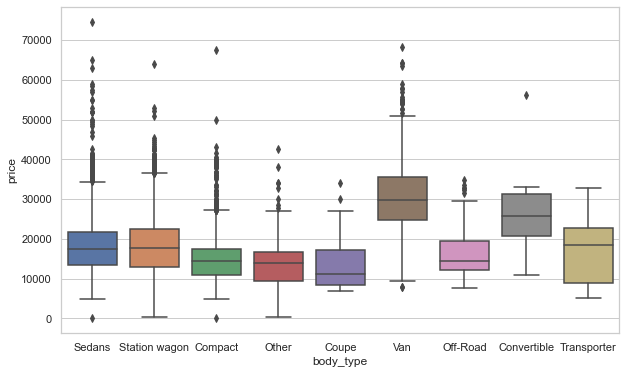

In [180]:
sns.boxplot(x="body_type", y="price", data=df);

In [117]:
# As a result of the analysis of above, it was decided to fill null values in body_type column with the mode of each make_model group

df["body_type"] = df.groupby("make_model")["body_type"].apply(lambda x: x.fillna(x.mode()[0]))

In [118]:
# Checking the number of nulls after filling null values

df.body_type.isnull().sum()

0

In [119]:
# Checking the value_counts of body_type column after filling null values

df.body_type.value_counts(dropna=False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## vat column

In [120]:
# Checking null values

null_check("vat")

Column name : vat
------------------------------------------------------------
Number of nulls : 4513
Percent of nulls : % 28.35
Value_counts : 
 VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64


In [121]:
# Checking the descriptive values of vat column for each make_model group

df.groupby("make_model").vat.describe()

,count,unique,top,freq
make_model,,,,
Audi A1,1855,2,VAT deductible,1774
Audi A2,1,1,VAT deductible,1
Audi A3,2310,2,VAT deductible,2209
Opel Astra,1873,2,VAT deductible,1828
Opel Corsa,1648,2,VAT deductible,1607
Opel Insignia,2030,2,VAT deductible,1980
Renault Clio,1058,2,VAT deductible,984
Renault Duster,16,1,VAT deductible,16
Renault Espace,615,2,VAT deductible,581


In [122]:
# Checking the value_counts of vat column for each make_model group

df.groupby("make_model").vat.value_counts(dropna=False)

make_model      vat             
Audi A1         VAT deductible      1774
                NaN                  759
                Price negotiable      81
Audi A2         VAT deductible         1
Audi A3         VAT deductible      2209
                NaN                  787
                Price negotiable     101
Opel Astra      VAT deductible      1828
                NaN                  653
                Price negotiable      45
Opel Corsa      VAT deductible      1607
                NaN                  571
                Price negotiable      41
Opel Insignia   VAT deductible      1980
                NaN                  568
                Price negotiable      50
Renault Clio    VAT deductible       984
                NaN                  781
                Price negotiable      74
Renault Duster  NaN                   18
                VAT deductible        16
Renault Espace  VAT deductible       581
                NaN                  376
                Price ne

In [123]:
# vat column has so many null values and it is difficut to fill these null values from other columns.
# Also most of the values of vat column is VAT deductible.
# Filling null values in vat column with its' mode or with mode of vat for each make_model group 
# ..would not be usefull.
# Because of the reasons mentioned above, it was decided to drop vat column.

df.drop(columns="vat", inplace=True)

In [124]:
# Checking the shape of df after drop the vat colum

df.shape

(15919, 41)

## type column

In [125]:
# Checking null values

null_check("type")

Column name : type
------------------------------------------------------------
Number of nulls : 2
Percent of nulls : % 0.01
Value_counts : 
 Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64


In [126]:
# Checking the rows which their type value is null

df[df.type.isnull()]

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
2765,Audi A3,SPB 2.0 TDI S tronic Sport,Sedans,17900.0,115137.0,NaN,NaN,NaN,NaN,NaN,Diesel,NaN,NaN,2016.0,White,NaN,NaN,5.0,5.0,Automatic,1968.0,4.0,front,Diesel,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofi...",6.0,110.0,NaN,NaN,NaN,Cloth,Other,NaN,4.5,5.3,4.1
5237,Audi A3,SPB 1.6 TDI 116 CV S tronic,Sedans,25400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grey,NaN,NaN,5.0,5.0,Automatic,1598.0,4.0,front,Diesel,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofi...",7.0,85.0,NaN,NaN,NaN,Cloth,Other,NaN,3.9,4.1,3.7


In [127]:
# Checking the mode of type column

df.type.mode()

0    Used
dtype: object

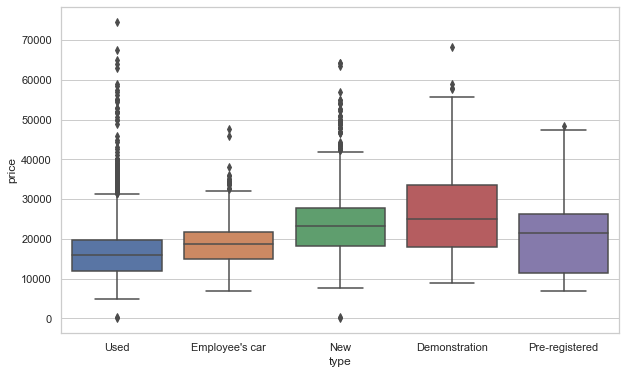

In [182]:
# Checking boxplots for type column

sns.boxplot(x="type", y="price", data=df);

In [183]:
# As a result of the analysis above it was decided to fill null values in type column with its' mode

df["type"] = df.type.fillna(df.type.mode()[0])

In [184]:
# Checking the number of nulls after filling null values

df.type.isnull().sum()

0

## age(first_registration) column

In [130]:
# Checking null values

null_check("first_registration")

Column name : first_registration
------------------------------------------------------------
Number of nulls : 1597
Percent of nulls : % 10.03
Value_counts : 
 2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: first_registration, dtype: int64


In [131]:
# Creating age column using values of first_registration column

# Assumption : We will assume that we are in 2019
    
df["age"] = 2019 - df.first_registration

In [132]:
# Checking age column

df.age

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

In [133]:
# drop first_registration column

df.drop(columns="first_registration", inplace=True)

In [134]:
# Checking the descriptive values of age column

df.age.describe()

count    14322.000000
mean         1.542382
std          1.076917
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: age, dtype: float64

In [135]:
# Checking null values for age column

null_check("age")

Column name : age
------------------------------------------------------------
Number of nulls : 1597
Percent of nulls : % 10.03
Value_counts : 
 1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64


In [136]:
# Checking the descriptive values of age column for each type group

df.groupby("type").age.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Demonstration,791.0,0.240202,0.516024,0.0,0.0,0.0,0.0,3.0
Employee's car,1008.0,1.005952,0.540297,0.0,1.0,1.0,1.0,3.0
New,103.0,0.029126,0.168983,0.0,0.0,0.0,0.0,1.0
Pre-registered,1358.0,0.134021,0.365829,0.0,0.0,0.0,0.0,3.0
Used,11062.0,1.871361,0.958498,0.0,1.0,2.0,3.0,3.0


In [137]:
# Checking the descriptive values of age column for each km group

df.groupby("km").age.mean().value_counts()

1.000000    2352
3.000000    1866
2.000000    1556
0.000000     317
1.500000     102
            ... 
0.727273       1
1.116279       1
0.812500       1
1.714286       1
2.777778       1
Name: age, Length: 183, dtype: int64

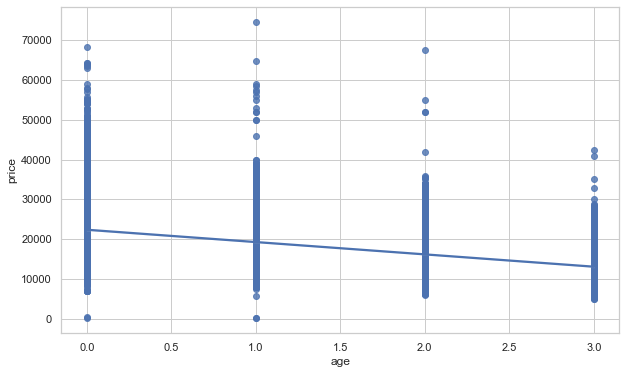

In [185]:
sns.regplot(x="age", y="price", data=df);

In [138]:
# As it is seen from the analysis above
# it was decided to fill null values in age column with median of each "type" group

df["age"] = df.groupby("type").age.apply(lambda x: x.fillna(x.median()))

In [139]:
# Checking the number of nulls after filling null values

df["age"].isnull().sum()

0

## km column

In [140]:
# Checking null values

null_check("km")

Column name : km
------------------------------------------------------------
Number of nulls : 1024
Percent of nulls : % 6.43
Value_counts : 
 10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64


In [141]:
# Checking the descriptive values of km column

df.km.describe()

count     14895.000000
mean      34130.127828
std       37352.977568
min           0.000000
25%        5153.000000
50%       22740.000000
75%       49371.500000
max      317000.000000
Name: km, dtype: float64

In [142]:
# Checking the descriptive values of km by grouping type and age

df.groupby(["type", "age"]).km.describe().T

type  Demonstration                                           Employee's car  \
age             0.0           1.0           2.0           3.0            0.0   
count    604.000000    130.000000     27.000000      2.000000     121.000000   
mean    3373.867550   8294.200000  25327.296296  45500.000000    4473.933884   
std     3540.544241   7998.986641  17914.687197  14849.242405    5473.430160   
min        3.000000      8.000000     20.000000  35000.000000       1.000000   
25%      450.000000   1601.000000  15470.500000  40250.000000     150.000000   
50%     2900.000000   5192.500000  18900.000000  45500.000000    3811.000000   
75%     5000.000000  13737.500000  28238.000000  50750.000000    6300.000000   
max    20000.000000  38400.000000  78000.000000  56000.000000   37500.000000   

type                                                       New              \
age             1.0            2.0            3.0          0.0         1.0   
count    766.000000      99.000000      17.000000   799.000000    2.000000   
mean   19295.278068   37926.505051   59123.647059    16.987484   53.500000   
std     9381.306327   21932.485039   28115.753329    95.029727   65.760931   
min        1.000000      59.000000    7790.000000     0.000000    7.000000   
25%    11267.750000   22138.000000   40700.000000     5.000000   30.250000   
50%    21000.000000   37750.000000   58962.000000    10.000000   53.500000   
75%    26957.500000   46500.000000   84386.000000    10.000000   76.750000   
max    80009.000000  112789.000000  103000.000000  2500.000000  100.000000   

type  Pre-registered                                             Used  \
age              0.0           1.0           2.0   3.0            0.0   
count    1102.000000    134.000000      9.000000   1.0     803.000000   
mean      100.648820    435.514925   1854.000000  10.0    3712.170610   
std       649.074569   1902.269846   4129.196502   NaN    8499.409143   
min         1.000000      1.000000      1.000000  10.0       1.000000   
25%         7.000000     10.000000      1.000000  10.0      35.500000   
50%        10.000000     12.000000     99.000000  10.0    1233.000000   
75%        20.000000     80.000000    153.000000  10.0    5000.000000   
max      9998.000000  15378.000000  12300.000000  10.0  127022.000000   

type                                                
age              1.0            2.0            3.0  
count    3454.000000    3171.000000    3654.000000  
mean    18807.503474   41887.937559   77566.423098  
std     10952.380152   28563.951151   39184.188242  
min         1.000000       5.000000      35.000000  
25%     10800.000000   21533.500000   48103.750000  
50%     18000.000000   34732.000000   73000.000000  
75%     25096.250000   55000.000000   99987.500000  
max    136000.000000  317000.000000  291800.000000

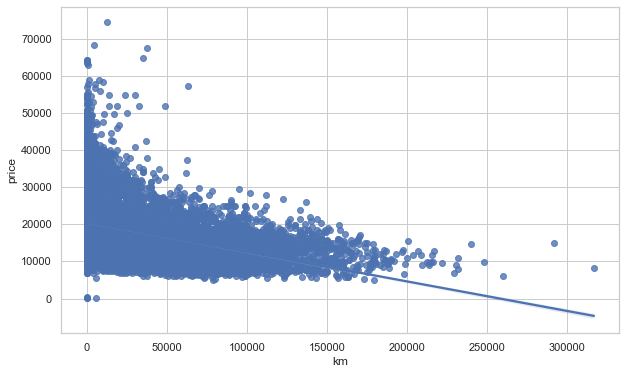

In [187]:
sns.regplot(x="km", y="price", data=df);

In [143]:
# As it is seen from the analysis above it was decided to fill null values in km column with
# .. median values by grouping type and age

df["km"] = df.groupby(["type", "age"]).km.apply(lambda x: x.fillna(x.median()))

In [144]:
# Checking the number of nulls after filling null values

df["km"].isnull().sum()

0

## prev_owner  and previous_owners columns

In [145]:
# Checking null values

null_check("prev_owner")

Column name : prev_owner
------------------------------------------------------------
Number of nulls : 6828
Percent of nulls : % 42.89
Value_counts : 
 1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64


In [146]:
# Checking null values

null_check("previous_owners")

Column name : previous_owners
------------------------------------------------------------
Number of nulls : 6640
Percent of nulls : % 41.71
Value_counts : 
 1                                                                      8103
NaN                                                                    6640
2                                                                       766
0                                                                       163
3                                                                        17
                                                                       ... 
1,111 g CO2/km (comb)                                                     1
1,Euro 6                                                                  1
2,119 g CO2/km (comb)                                                     1
1,,6.6 l/100 km (comb),,8.1 l/100 km (city),,5.7 l/100 km (country)       1
1,142 g CO2/km (comb)                                                     1
Name: 

In [147]:
# To reduce the number of nulls in prev_owner column previous_owners values was taken
# ..with string methods and assigned to prev_owner column

df["prev_owner"] = df.previous_owners.str.split(",").str[0].astype(float)

In [148]:
# Checking the descriptive values of prev_owner by grouping type

df.groupby("type").prev_owner.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Demonstration,514.0,1.011673,0.107515,1.0,1.0,1.0,1.0,2.0
Employee's car,655.0,1.009160,0.146023,0.0,1.0,1.0,1.0,2.0
New,179.0,0.083799,0.277863,0.0,0.0,0.0,0.0,1.0
Pre-registered,845.0,1.007101,0.084015,1.0,1.0,1.0,1.0,2.0
Used,7086.0,1.109512,0.331166,0.0,1.0,1.0,1.0,4.0


In [149]:
# Checking the mode values of prev_owner by grouping type

df.groupby("type").prev_owner.apply(lambda x : x.mode()[0])

type
Demonstration     1.0
Employee's car    1.0
New               0.0
Pre-registered    1.0
Used              1.0
Name: prev_owner, dtype: float64

In [150]:
# Checking the mode values of prev_owner by grouping age

df.groupby("age").prev_owner.apply(lambda x : x.mode()[0])

age
0.0    1.0
1.0    1.0
2.0    1.0
3.0    1.0
Name: prev_owner, dtype: float64

In [151]:
# Checking the value_counts of prev_owner by grouping type

df.groupby("type").prev_owner.value_counts()

type            prev_owner
Demonstration   1.0            508
                2.0              6
Employee's car  1.0            641
                2.0             10
                0.0              4
New             0.0            164
                1.0             15
Pre-registered  1.0            839
                2.0              6
Used            1.0           6291
                2.0            756
                0.0             20
                3.0             17
                4.0              2
Name: prev_owner, dtype: int64

In [152]:
# Checking the mode values of prev_owner by grouping type and age

df.groupby(["type", "age"]).prev_owner.apply(lambda x : x.mode()[0])

type            age
Demonstration   0.0    1.0
                1.0    1.0
                2.0    1.0
                3.0    1.0
Employee's car  0.0    1.0
                1.0    1.0
                2.0    1.0
                3.0    1.0
New             0.0    0.0
                1.0    1.0
Pre-registered  0.0    1.0
                1.0    1.0
                2.0    1.0
                3.0    1.0
Used            0.0    1.0
                1.0    1.0
                2.0    1.0
                3.0    1.0
Name: prev_owner, dtype: float64

In [153]:
# As it is seen from the analysis above it was decided to fill null values in prev_owner column
# ..with mode values by grouping type

df["prev_owner"] = df.groupby("type").prev_owner.apply(lambda x : x.fillna(x.mode()[0]))
df["prev_owner"] 

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15914    0.0
15915    1.0
15916    1.0
15917    1.0
15918    1.0
Name: prev_owner, Length: 15919, dtype: float64

In [155]:
# Checking the number of nulls after filling null values

df.prev_owner.isnull().sum()

0

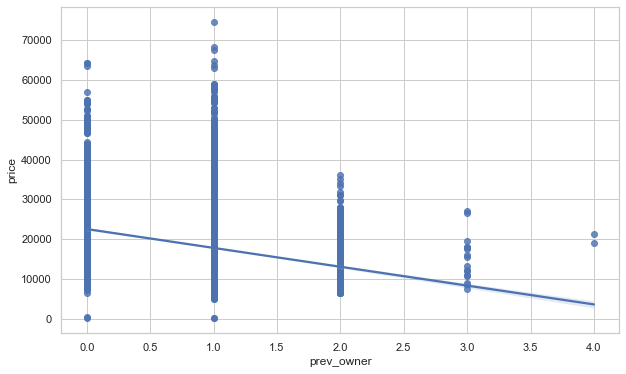

In [174]:
sns.regplot(x="prev_owner", y= "price", data=df);

**Conclusion about previous_owners column:** As prewious-owners column contains values that can be used to fill other column, it will drop at the end of the handling with missing value process.

In [179]:
# Creating cols_to_drop 

cols_to_drop = []
cols_to_drop.append("previous_owners")

## insp_new column

In [158]:
# Checking null values

null_check("insp_new")

Column name : insp_new
--------------------------------
Number of nulls : 11987
Percent of nulls : % 75.3
Value_counts : 
 NaN    11987
Yes     3932
Name: insp_new, dtype: int64


In [159]:
# Checking the value_counts of prev_owner by grouping type

df.groupby("type").insp_new.value_counts(dropna=False)

type            insp_new
Demonstration   NaN          554
                Yes          242
Employee's car  NaN          820
                Yes          191
New             NaN         1198
                Yes          452
Pre-registered  NaN          992
                Yes          372
Used            NaN         8423
                Yes         2675
Name: insp_new, dtype: int64

In [160]:
# Checking the value_counts of prev_owner by grouping age

df.groupby("age").insp_new.value_counts(dropna=False)

age  insp_new
0.0  NaN         3177
     Yes         1234
1.0  NaN         3332
     Yes         1193
2.0  NaN         2715
     Yes          594
3.0  NaN         2763
     Yes          911
Name: insp_new, dtype: int64

In [162]:
# As it is seen above insp_new column contains %75 null vallues and the remaining value is "Yes".
# Also insp_new(inspection new) column doesn't any affect on target feature (price).
# Because of the reasons mentioned above, it was decided to drop insp_new column.

df.drop(columns="insp_new", inplace=True)

In [163]:
df.shape

(15919, 40)

## next_insp_date

In [164]:
# Checking null values

null_check("next_insp_date")

Column name : next_insp_date
--------------------------------
Number of nulls : 12384
Percent of nulls : % 77.79
Value_counts : 
 NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
02/2021      168
04/2022      144
05/2022      143
01/2021      132
03/2022      121
03/2020      113
02/2022      112
01/2022      107
02/2020       74
04/2020       68
07/2021       68
08/2021       64
01/2020       63
05/2020       62
11/2020       58
06/2020       58
04/2019       50
12/2020       50
05/2019       50
11/2021       49
07/2020       48
09/2021       46
07/2019       43
09/2019       41
06/2019       40
06/2022       40
10/2020       38
03/2019       36
08/2020       35
11/2019       35
08/2019       32
10/2019       32
02/2019       31
01/2019       28
09/2020       27
12/2021       22
01/2023       20
10/2021       20
12/2019       20
02/2023       12
10/2018       10
03/2023       10
07/2022        9
08/2022        8
12/2018        6
01/2001        5
07/

In [165]:
# As it is seen above next_insp_date column contains %77.8 null vallues.
# Also next_insp_date(next inspection date) column doesn't any affect on target feature (price).
# Because of the reasons mentioned above, it was decided to drop next_insp_date column.

df.drop(columns="next_insp_date", inplace=True)

In [166]:
df.shape

(15919, 39)

## warranty_month column

In [167]:
# Checking null values

null_check("warranty_month")

Column name : warranty_month
--------------------------------
Number of nulls : 11066
Percent of nulls : % 69.51
Value_counts : 
 NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
4.0         3
1.0         3
19.0        3
34.0        3
13.0        3
28.0        2
22.0        2
14.0        2
11.0        2
46.0        2
21.0        2
9.0         2
17.0        2
45.0        2
33.0        1
40.0        1
65.0        1
10.0        1
15.0        1
7.0         1
8.0         1
56.0        1
49.0        1
47.0        1
30.0        1
Name: warranty_month, dtype: int64


In [169]:
# Checking the descriptive values of warranty_month by grouping age

df.groupby("age").warranty_month.describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,1153.0,30.510841,17.079779,2.0,24.0,24.0,36.0,72.0
1.0,1366.0,22.549048,15.331507,1.0,12.0,12.0,24.0,60.0
2.0,1127.0,17.345164,12.196465,1.0,12.0,12.0,24.0,60.0
3.0,1207.0,17.302403,14.324613,1.0,12.0,12.0,12.0,60.0


In [1062]:
# Checking the mode values of warranty_month by grouping age

df.groupby("age").warranty_month.apply(lambda x: x.mode()[0])

age
0.0    24.0
1.0    12.0
2.0    12.0
3.0    12.0
Name: warranty_month, dtype: float64

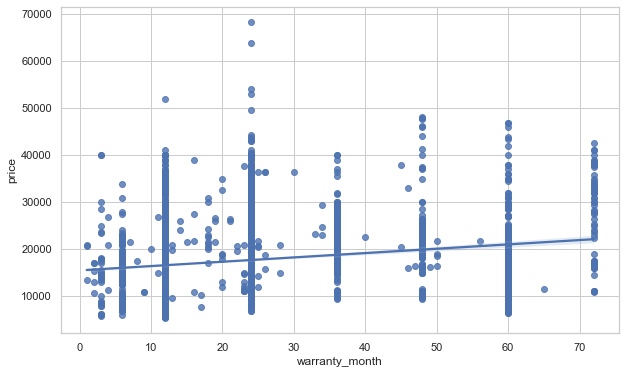

In [175]:
sns.regplot(x="warranty_month", y="price", data=df);

In [176]:
# As it is seen above warranty_month column contains approximately %70 null vallues.
# Also warranty_month column doesn't any meaningful affect on target feature (price).
# Because of the reasons mentioned above, it was decided to drop next_insp_date column.

df.drop(columns="warranty_month", inplace=True)

In [177]:
df.shape

(15919, 38)

## body_color and body_color_original columns

In [188]:
# Checking null values for body_color column

null_check("body_color")

Column name : body_color
--------------------------------
Number of nulls : 597
Percent of nulls : % 3.75
Value_counts : 
 Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


In [192]:
# Checking null values for body_color_original column

null_check("body_color_original")

Column name : body_color_original
--------------------------------
Number of nulls : 3774
Percent of nulls : % 23.71
Value_counts : 
 NaN                              3774
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1927, dtype: int64


In [1073]:
# Checking how many of the null values in body_color column are not null in body_color_original column

df[df.body_color.isnull()]["body_color_original"].notna().sum()

392

In [191]:
# Checking body_color_original values which corresponds null values in body_color column

df[df.body_color.isnull()]["body_color_original"].value_counts()

# As it is seen the results below body_color_original column can't be used to fill values in body_color column

wählbar - ggf. mit Aufpreis       118
wählbar                            88
Metallic o. Uni (wählbar)          33
wählbar - ggf gegen Aufpreis       25
Other                              14
mitoschwarz                         8
Smaragd Gruen (Mi)                  5
BLANCO ALPINO                       4
verschiedene Farben                 4
BLACK MEET KETTLE MET-4 (507B)      3
TEINTE CAISS                        3
Rouge Braun                         3
Kosmosblau Metallic                 3
wählbar (bei Metallic +)            3
Cortinaweiss                        2
Cronos / Negro Mito                 2
gletscherweiÃŸ                      2
BLEU UTOPIA                         2
(Silber) - Licht Grau               2
SWITCHBLADE SILVER MET (G)          2
NOIR MYTHIC METAL                   2
GF6 Satin Steel Grey                1
SATIN STEEL GRAY MET-4 (501B)       1
GAN Sovereign Silver                1
YOU DRIVE ME GRAZY MET-4(509B)      1
Srebrny                             1
GDX Darkmoon

In [195]:
# Checking the descriptive values of body_color column by grouping make_model and body_type

df.groupby(["make_model","body_type"]).body_color.describe()

count unique     top freq
make_model     body_type                              
Audi A1        Compact         995     10   Black  320
               Coupe             2      1   Black    2
               Other            13      4   White    5
               Sedans         1509     11   White  440
               Station wagon    21      5   White    8
               Van               1      1   Black    1
Audi A2        Off-Road          1      1    Grey    1
Audi A3        Compact         177      7   Black   59
               Convertible       8      5   White    3
               Coupe             4      1  Silver    4
               Other            15      4   Black    4
               Sedans         2545      9   Black  768
               Station wagon   275     10   Black  106
Opel Astra     Compact         175      9    Grey   46
               Coupe             2      2     Red    1
               Off-Road          1      1  Silver    1
               Other            65      8    Grey   24
               Sedans         1001     10    Grey  223
               Station wagon  1143     10   Black  326
Opel Corsa     Compact        1213      9    Grey  255
               Coupe            13      5    Grey    5
               Off-Road          3      3    Blue    1
               Other            87      7    Grey   21
               Sedans          866     11    Grey  221
               Transporter       7      3   White    3
               Van               2      1   White    2
Opel Insignia  Compact          26      5   White    8
               Coupe             0      0     NaN  NaN
               Off-Road          3      3   Green    1
               Other            42      6    Grey   11
               Sedans          797     10    Grey  211
               Station wagon  1511     10    Grey  464
               Van               1      1    Grey    1
Renault Clio   Compact         460      7   White  164
               Coupe             1      1   White    1
               Off-Road          2      2   White    1
               Other            51      8   White   16
               Sedans          926      9   White  373
               Station wagon   324      8    Grey  112
               Transporter      27      2   White   25
               Van               2      1   White    2
Renault Duster Off-Road         34      2   White   26
Renault Espace Compact           6      3    Grey    3
               Coupe             0      0     NaN  NaN
               Off-Road          8      4   Black    5
               Other             8      3   Black    4
               Sedans           19      5   Black    9
               Station wagon    89      7   Black   24
               Transporter      52      7    Grey   17
               Van             789      9    Grey  299

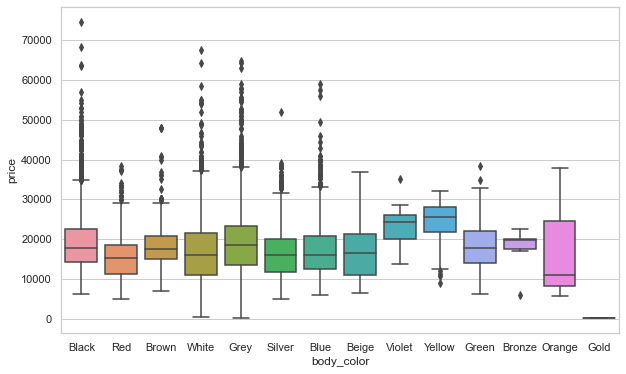

In [200]:
# Checking boxplots for body_color column

sns.boxplot(x="body_color", y="price", data=df);

In [197]:
# As it is seen from the analysis above
# it was decided to fill null values in body_color column with mode by grouping "make_model" and "body_type"

df["body_color"] = df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.body_color.mode()[0]))

In [198]:
df["body_color"].isnull().sum()

0

In [193]:
# Also body_color_original column can't be used to fill null values in other columns.
# It was decided to drop body_color_original column.

cols_to_drop.append("body_color_original")

## paint_type

In [199]:
# Checking null values for paint_type column

null_check("paint_type")

Column name : paint_type
--------------------------------
Number of nulls : 5772
Percent of nulls : % 36.26
Value_counts : 
 Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64


In [203]:
# Checking the descriptive values of paint_type column by grouping make_model, body_type, body_color

df.groupby(["make_model", "body_type", "body_color"]).paint_type.describe().T

make_model   Audi A1                                                    \
body_type    Compact                                                     
body_color     Beige     Black      Blue     Brown     Green      Grey   
count              6       257        86         9         5       125   
unique             1         1         1         1         1         1   
top         Metallic  Metallic  Metallic  Metallic  Metallic  Metallic   
freq               6       257        86         9         5       125   

make_model                                                              \
body_type                                              Coupe     Other   
body_color       Red    Silver     White    Yellow     Black     Black   
count             79        41       104        16         2         3   
unique             2         1         2         1         1         1   
top         Metallic  Metallic  Metallic  Metallic  Metallic  Metallic   
freq              76        41       102        16         2         3   

make_model                                                              \
body_type                                   Sedans                       
body_color      Blue      Grey     White     Beige     Black      Blue   
count              1         3         3        10       255       149   
unique             1         1         1         2         2         2   
top         Metallic  Metallic  Metallic  Metallic  Metallic  Metallic   
freq               1         3         3         9       247       145   

make_model                                                                     \
body_type                                                                       
body_color     Brown     Green      Grey       Red    Silver Violet     White   
count             11         3       149       125        75      0       259   
unique             1         2         2         3         2      0         2   
top         Metallic  Metallic  Metallic  Metallic  Metallic    NaN  Metallic   
freq              11         2       143       115        71    NaN       237   

make_model                                                                  \
body_type            Station wagon                                           
body_color    Yellow         Black      Blue      Grey    Silver     White   
count             12             5         5         1         1         5   
unique             2             1         2         1         1         1   
top         Metallic      Metallic  Metallic  Metallic  Metallic  Metallic   
freq              10             5         4         1         1         5   

make_model             Audi A2   Audi A3                                \
body_type        Van  Off-Road   Compact                                 
body_color     Black      Grey     Black      Blue     Brown      Grey   
count              1         1        39        20         2        31   
unique             1         1         1         1         1         2   
top         Metallic  Metallic  Metallic  Metallic  Metallic  Metallic   
freq               1         1        39        20         2        30   

make_model                                                                     \
body_type                                Convertible                            
body_color       Red    Silver     White       Black      Blue Grey       Red   
count              1         5        11           1         1    0         1   
unique             1         1         2           1         1    0         1   
top         Metallic  Metallic  Metallic    Metallic  Metallic  NaN  Metallic   
freq               1         5         9           1         1  NaN         1   

make_model                                                               \
body_type                Coupe     Other                                  
body_color     White    Silver     Black      Blue      Grey      White   
count           

In [1088]:
# Checking other columns whether contains paint_type values

df.short_description[15917]

'Blue dCi 200CV EDC Business , NUOVA DA IMMATRICOLA'

In [1091]:
# Checking other columns whether contains paint_type values

df.inspection_new

0                     Yes,Euro 6
1                            NaN
2                            NaN
3                            NaN
4        Yes,109 g CO2/km (comb)
                  ...           
15914                        NaN
15915                        NaN
15916           Yes,Euro 6d-TEMP
15917                        NaN
15918    Yes,153 g CO2/km (comb)
Name: inspection_new, Length: 15919, dtype: object

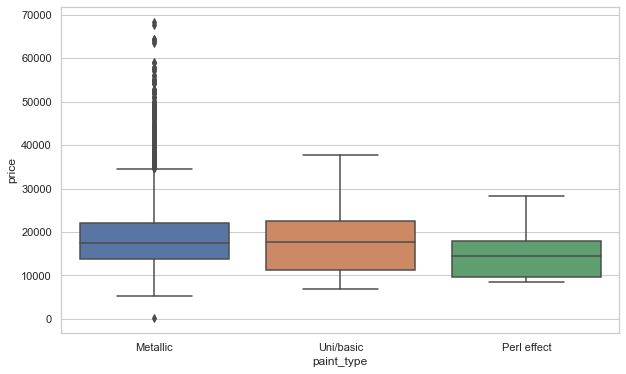

In [204]:
# Checking boxplots for paint_type column

sns.boxplot(x="paint_type", y="price", data=df);

In [205]:
# As a result of analysis above it was decided to fill null values in paint_type column with
# .. the mode values grouping by make_model, body_type and body_color columns

df["paint_type"] = df.groupby(["make_model", "body_type", "body_color"]).paint_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.paint_type.mode()[0]))

In [206]:
# Checking the number of nulls after filling null values

df["paint_type"].isnull().sum()

0

## nr_of_doors

In [207]:
# Checking null values for paint_type column

null_check("nr_of_doors")

Column name : nr_of_doors
--------------------------------
Number of nulls : 212
Percent of nulls : % 1.33
Value_counts : 
 5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64


In [217]:
# Checking the descriptive values of nr_of_doors column by grouping make_model and body_type

df.groupby(["make_model", "body_type"]).nr_of_doors.describe().T

make_model      Audi A1                                                      \
body_type       Compact    Coupe      Other       Sedans Station wagon  Van   
count       1039.000000  2.00000  13.000000  1538.000000     21.000000  1.0   
mean           4.447546  3.50000   4.615385     4.565670      4.761905  5.0   
std            0.894692  2.12132   0.506370     0.726784      0.538958  NaN   
min            2.000000  2.00000   4.000000     2.000000      3.000000  5.0   
25%            4.000000  2.75000   4.000000     4.000000      5.000000  5.0   
50%            5.000000  3.50000   5.000000     5.000000      5.000000  5.0   
75%            5.000000  4.25000   5.000000     5.000000      5.000000  5.0   
max            5.000000  5.00000   5.000000     5.000000      5.000000  5.0   

make_model  Audi A2     Audi A3                                            \
body_type  Off-Road     Compact Convertible Coupe      Other       Sedans   
count           1.0  182.000000     8.00000   4.0  16.000000  2605.000000   
mean            5.0    4.846154     2.37500   3.0   4.187500     4.709789   
std             NaN    0.502438     1.06066   0.0   1.167262     0.563414   
min             5.0    3.000000     2.00000   3.0   2.000000     2.000000   
25%             5.0    5.000000     2.00000   3.0   3.000000     5.000000   
50%             5.0    5.000000     2.00000   3.0   5.000000     5.000000   
75%             5.0    5.000000     2.00000   3.0   5.000000     5.000000   
max             5.0    5.000000     5.00000   3.0   5.000000     5.000000   

make_model                Opel Astra                                \
body_type  Station wagon     Compact     Coupe Off-Road      Other   
count         282.000000  185.000000  2.000000      1.0  67.000000   
mean            4.592199    4.972973  4.000000      5.0   4.895522   
std             0.520412    0.162602  1.414214      NaN   0.308188   
min             2.000000    4.000000  3.000000      5.0   4.000000   
25%             4.000000    5.000000  3.500000      5.0   5.000000   
50%             5.000000    5.000000  4.000000      5.0   5.000000   
75%             5.000000    5.000000  4.500000      5.0   5.000000   
max             5.000000    5.000000  5.000000      5.0   5.000000   

make_model                              Opel Corsa                      \
body_type        Sedans Station wagon      Compact      Coupe Off-Road   
count       1053.000000   1218.000000  1232.000000  13.000000      3.0   
mean           4.765432      4.770115     4.019481   3.153846      5.0   
std            0.430604      0.420932     0.998591   0.554700      0.0   
min            3.000000      4.000000     2.000000   3.000000      5.0   
25%            5.000000      5.000000     3.000000   3.000000      5.0   
50%            5.000000      5.000000     4.000000   3.000000      5.0   
75%            5.000000      5.000000     5.000000   3.000000      5.0   
max            5.000000      5.000000     5.000000   5.000000      5.0   

make_model                                         Opel Insignia        \
body_type       Other      Sedans Transporter  Van       Compact Coupe   
count       87.000000  875.000000    7.000000  2.0     27.000000   1.0   
mean         4.850575    4.628571    3.857143  5.0      4.962963   4.0   
std          0.539783    0.771552    1.069045  0.0      0.192450   NaN   
min          2.000000    2.000000    3.000000  5.0      4.000000   4.0   
25%          5.000000    5.000000    3.000000  5.0      5.000000   4.0   
50%          5.000000    5.000000    3.000000  5.0      5.000000   4.0   
75%          5.000000    5.000000    5.000000  5.0      5.000000   4.0   
max          5.000000    5.000000    5.000000  5.0      5.000000   4.0   

make_model                                                    Renault Clio  \
body_type  Off-Road      Other      Sedans Station wagon  Van      Compact   
count           7.0  48.000000  900.000000   1614.000000  1.0   484.000000   
mean            5.0  

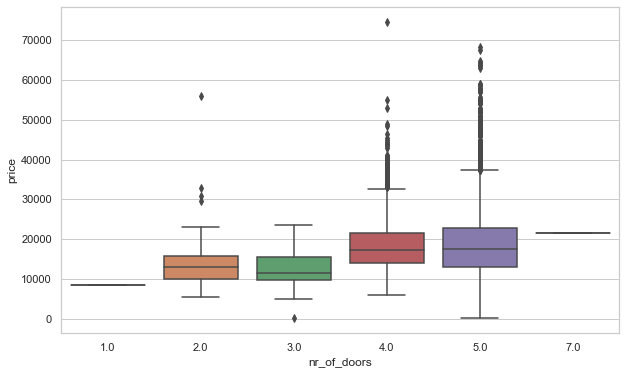

In [210]:
# Checking boxplots for nr_of_doors column

sns.boxplot(x="nr_of_doors", y="price" , data= df);

In [211]:
# As a result of analysis above it was decided to fill null values in nr_of_doors column with
# .. the mode values grouping by make_model and body_type columns

df["nr_of_doors"] = df.groupby(["make_model", "body_type"]).nr_of_doors.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.nr_of_doors.mode()[0]))

In [1108]:
# Checking the number of nulls after filling null values

df["nr_of_doors"].isnull().sum()

0

## nr_of_seats

In [212]:
# Checking null values

null_check("nr_of_seats")

Column name : nr_of_seats
--------------------------------
Number of nulls : 977
Percent of nulls : % 6.14
Value_counts : 
 5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64


In [215]:
# Checking the descriptive values of nr_of_seats column by grouping make_model and body_type

df.groupby(["make_model", "body_type"]).nr_of_seats.describe().T

make_model     Audi A1                                                       \
body_type      Compact     Coupe      Other       Sedans Station wagon  Van   
count       971.000000  2.000000  13.000000  1468.000000     20.000000  0.0   
mean          4.555098  4.500000   4.923077     4.563351      4.700000  NaN   
std           0.501341  0.707107   0.277350     0.496139      0.470162  NaN   
min           3.000000  4.000000   4.000000     4.000000      4.000000  NaN   
25%           4.000000  4.250000   5.000000     4.000000      4.000000  NaN   
50%           5.000000  4.500000   5.000000     5.000000      5.000000  NaN   
75%           5.000000  4.750000   5.000000     5.000000      5.000000  NaN   
max           6.000000  5.000000   5.000000     5.000000      5.000000  NaN   

make_model  Audi A2 Audi A3                                            \
body_type  Off-Road Compact Convertible Coupe      Other       Sedans   
count           1.0   175.0    7.000000   4.0  10.000000  2503.000000   
mean            5.0     5.0    4.285714   5.0   4.900000     4.992409   
std             NaN     0.0    0.487950   0.0   0.316228     0.086812   
min             5.0     5.0    4.000000   5.0   4.000000     4.000000   
25%             5.0     5.0    4.000000   5.0   5.000000     5.000000   
50%             5.0     5.0    4.000000   5.0   5.000000     5.000000   
75%             5.0     5.0    4.500000   5.0   5.000000     5.000000   
max             5.0     5.0    5.000000   5.0   5.000000     5.000000   

make_model               Opel Astra                                            \
body_type  Station wagon    Compact Coupe Off-Road Other Sedans Station wagon   
count              277.0      174.0   1.0      1.0  61.0  985.0   1140.000000   
mean                 5.0        5.0   4.0      5.0   5.0    5.0      4.996491   
std                  0.0        0.0   NaN      NaN   0.0    0.0      0.059157   
min                  5.0        5.0   4.0      5.0   5.0    5.0      4.000000   
25%                  5.0        5.0   4.0      5.0   5.0    5.0      5.000000   
50%                  5.0        5.0   4.0      5.0   5.0    5.0      5.000000   
75%                  5.0        5.0   4.0      5.0   5.0    5.0      5.000000   
max                  5.0        5.0   4.0      5.0   5.0    5.0      5.000000   

make_model   Opel Corsa                                                    \
body_type       Compact      Coupe Off-Road Other      Sedans Transporter   
count       1205.000000  12.000000      1.0  86.0  788.000000    7.000000   
mean           4.995851   4.750000      5.0   5.0    4.998731    3.142857   
std            0.064309   0.866025      NaN   0.0    0.035624    1.463850   
min            4.000000   2.000000      5.0   5.0    4.000000    2.000000   
25%            5.000000   5.000000      5.0   5.0    5.000000    2.000000   
50%            5.000000   5.000000      5.0   5.0    5.000000    2.000000   
75%            5.000000   5.000000      5.0   5.0    5.000000    4.500000   
max            5.000000   5.000000      5.0   5.0    5.000000    5.000000   

make_model      Opel Insignia                                                 \
body_type   Van       Compact Coupe Off-Road Other Sedans Station wagon  Van   
count       0.0          26.0   0.0      7.0  44.0  857.0   1555.000000  1.0   
mean        NaN           5.0   NaN      5.0   5.0    5.0      4.996785  5.0   
std         NaN           0.0   NaN      0.0   0.0    0.0      0.084072  NaN   
min         NaN           5.0   NaN      5.0   5.0    5.0      2.000000  5.0   
25%         NaN           5.0   NaN      5.0   5.0    5.0      5.000000  5.0   
50%         NaN           5.0   NaN      5.0   5.0    5.0      5.000000  5.0   
75%         NaN           5.0   NaN      5.0   5.0    5.0      5.000000  5.0   
max         NaN           5.0   NaN      5.0   5.0    5.0      5.000000  5.0   

make_model Renault Clio                                                      \
body_type       

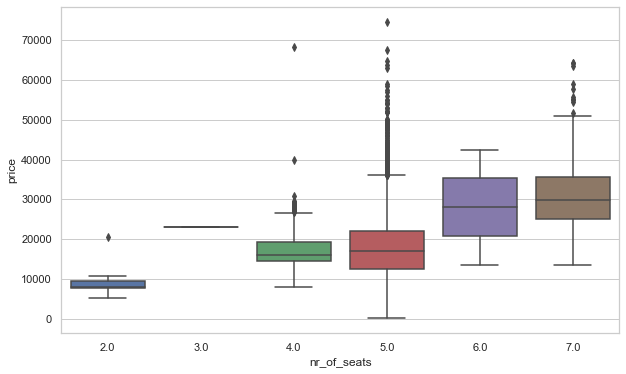

In [216]:
# Checking boxplots for nr_of_seats column

sns.boxplot(x="nr_of_seats", y="price" , data= df);

In [219]:
# As a result of analysis above it was decided to fill null values in nr_of_seats column with
# .. the mode values grouping by make_model and body_type columns

df["nr_of_seats"] = df.groupby(["make_model", "body_type"]).nr_of_seats.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.nr_of_seats.mode()[0]))

In [220]:
# Checking the number of nulls after filling null values

df["nr_of_seats"].isnull().sum()

0

## displacement_cc column

In [221]:
# Checking null values

null_check("displacement_cc")

Column name : displacement_cc
--------------------------------
Number of nulls : 496
Percent of nulls : % 3.12
Value_counts : 
 1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0        1
1333.0        1
54.0    

In [226]:
# Checking other columns whether contains displacement_cc values

df.short_description

0              Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                           1.8 TFSI sport
2        Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
3                                  1.4 TDi Design S tronic
4        Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
                               ...                        
15914                Blue dCi 200CV EDC Executive 4Control
15915                  TCe 225 EDC GPF LIM Deluxe Pano,RFK
15916    Blue dCi 200 EDC Initiale Paris Leder LED Navi...
15917    Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...
15918          INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
Name: short_description, Length: 15919, dtype: object

In [227]:
df["short_description"][df.displacement_cc.isnull()]

142      1.6 TDI METAL PLUS *S-TRONIC* BI-COLOR*NAVI_ X...
191        Sportback Sportback 1.4 TDI S tronic Adrenalin2
404       SPB 1.4TDI SPORT S-TRONIC NAVI XENON PADDLES PDC
412                            SPB 1.6 TDI 116 CV S tronic
505           Sportback Sportback 1.0 TFSI 95CV Attraction
                               ...                        
15791                          V dCi 160 Energy Twin Turbo
15795                         EXECUTIVE Energy dCi 160 EDC
15804                      Initiale Paris Blue dCi 200 EDC
15805    Init. P. Blue dCi 147kW (200CV) EDC - 18 Leomotor
15906                     V Tce 225 EDC FAP Initiale Paris
Name: short_description, Length: 496, dtype: object

In [228]:
# As it is seen above analysis short_description column contains displacement_cc values.
# So we can extreact displacement_cc values from short_description column

df["short_description"][df.displacement_cc.isnull()].str.extract("(\d\.\d)")

,0
142,1.6
191,1.4
404,1.4
412,1.6
505,1.0
...,...
15791,NaN
15795,NaN
15804,NaN
15805,NaN


In [232]:
# extreacting displacement_cc values from short_description column

df["fill_with"] = df.short_description.str.extract("(\d\.\d)").astype(float)*1000

In [233]:
# Filling the null values in displacement_cc column with the values in short_description column

df.displacement_cc.fillna(df["fill_with"], inplace=True)

In [1134]:
# Checking the number of nulls after filling null values with short_description columns' values

df.displacement_cc.isnull().sum()

179

In [234]:
# Dropping fill_with column

cols_to_drop.append("fill_with")

In [235]:
# Rounding displacement valeus to nearest hundred

df["displacement_cc"] = df.displacement_cc.round(-2)
df.displacement_cc

0        1400.0
1        1800.0
2        1600.0
3        1400.0
4        1400.0
          ...  
15914    2000.0
15915    1800.0
15916    2000.0
15917    2000.0
15918    1800.0
Name: displacement_cc, Length: 15919, dtype: float64

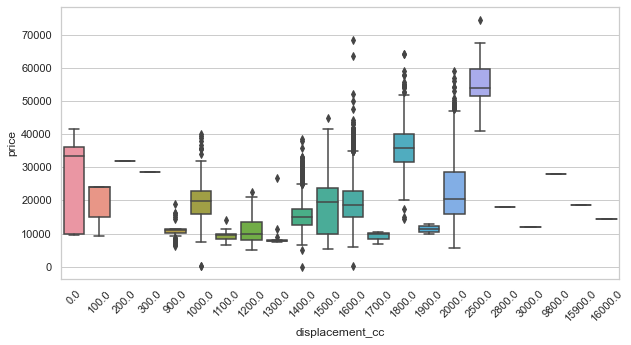

In [246]:
# Checking boxplots for displacement_cc column

fig = plt.figure(figsize=(10, 5))
sns.boxplot(x= "displacement_cc", y= "price", data=df)
plt.xticks(rotation=45) ;

In [248]:
# to fill remaining null values in displacement_cc column
# Checking the descriptive values of displacement_cc column by grouping make_model and body_type

df.groupby(["make_model", "body_type"]).displacement_cc.describe().T

make_model      Audi A1                                                       \
body_type       Compact        Coupe        Other       Sedans Station wagon   
count       1037.000000     2.000000    12.000000  1535.000000     20.000000   
mean        1164.898746  1300.000000  1100.000000  1204.951140   1280.000000   
std          354.129410   424.264069   233.549683   251.750548    219.089023   
min          300.000000  1000.000000  1000.000000  1000.000000   1000.000000   
25%         1000.000000  1150.000000  1000.000000  1000.000000   1000.000000   
50%         1000.000000  1300.000000  1000.000000  1000.000000   1400.000000   
75%         1400.000000  1450.000000  1000.000000  1400.000000   1400.000000   
max         9800.000000  1600.000000  1600.000000  2000.000000   1600.000000   

make_model          Audi A2      Audi A3                                    \
body_type      Van Off-Road      Compact  Convertible   Coupe        Other   
count          1.0      1.0   182.000000     8.000000     4.0    13.000000   
mean        2000.0   1600.0  1515.384615  1812.500000  1450.0  1461.538462   
std            NaN      NaN   223.445187   264.237447   300.0   298.715198   
min         2000.0   1600.0  1000.000000  1400.000000  1000.0  1000.000000   
25%         2000.0   1600.0  1400.000000  1575.000000  1450.0  1400.000000   
50%         2000.0   1600.0  1600.000000  2000.000000  1600.0  1600.000000   
75%         2000.0   1600.0  1600.000000  2000.000000  1600.0  1600.000000   
max         2000.0   1600.0  2500.000000  2000.000000  1600.0  2000.000000   

make_model                              Opel Astra                   \
body_type        Sedans Station wagon      Compact   Coupe Off-Road   
count       2600.000000    276.000000   185.000000     2.0      1.0   
mean        1525.961538   1421.376812  1430.270270  1400.0   1400.0   
std          284.387650    352.878433   239.456886     0.0      NaN   
min         1000.000000   1000.000000  1000.000000  1400.0   1400.0   
25%         1500.000000   1000.000000  1400.000000  1400.0   1400.0   
50%         1600.000000   1600.000000  1600.000000  1400.0   1400.0   
75%         1600.000000   1600.000000  1600.000000  1400.0   1400.0   
max         2500.000000   2500.000000  1600.000000  1400.0   1400.0   

make_model                                           Opel Corsa               \
body_type         Other       Sedans Station wagon      Compact        Coupe   
count         67.000000  1049.000000   1211.000000  1227.000000    12.000000   
mean        1446.268657  1343.660629   1510.074319  1335.859821  1233.333333   
std          201.003813   244.130220    446.730171   100.497003   115.470054   
min         1000.000000   100.000000    100.000000   100.000000  1000.000000   
25%         1400.000000  1000.000000   1400.000000  1200.000000  1200.000000   
50%         1400.000000  1400.000000   1600.000000  1400.000000  1200.000000   
75%         1600.000000  1600.000000   1600.000000  1400.000000  1250.000000   
max         1700.000000  1700.000000  15900.000000  1400.000000  1400.000000   

make_model                                                          \
body_type  Off-Road        Other       Sedans  Transporter     Van   
count           3.0    87.000000   868.000000     7.000000     2.0   
mean         1400.0  1386.206897  1298.732719  1214.285714  1200.0   
std             0.0    59.400912   100.107243    37.796447     0.0   
min          1400.0  1000.000000  1000.000000  1200.000000  1200.0   
25%          1400.0  1400.000000  1200.000000  1200.000000  1200.0   
50%          1400.0  1400.000000  1300.000000  1200.000000  1200.0   
75%          1400.0  1400.000000  1400.000000  1200.000000  1200.0   
max          1400.0  1400.000000  1400.000000  1300.000000  1200.0   

make_model Opel Insignia                                               \
body_type        Compact Coupe     Off-Road        Other       Sedans   
count          27.000000   0.0     7.000000    48.000000   

In [249]:
# As a result of analysis above it was decided to fill null values in displacement_cc column with
# .. the mode values grouping by make_model and body_type columns

df["displacement_cc"] = df.groupby(["make_model", "body_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0]))

In [250]:
# Checking the number of nulls after filling null values

df["displacement_cc"].isnull().sum()

0

## cylinders column

In [251]:
# Checking null values

null_check("cylinders")

Column name : cylinders
--------------------------------
Number of nulls : 5680
Percent of nulls : % 35.68
Value_counts : 
 4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64


In [254]:
# Checking the descriptive values of cylinders column by grouping make_model, body_type and displacement_cc columns

df.groupby(["make_model", "body_type", "displacement_cc"]).cylinders.describe().T

make_model      Audi A1                                                     \
body_type       Compact                                                      
displacement_cc 300.0   900.0       1000.0      1400.0  1500.0     1600.0    
count               0.0     0.0  391.000000  110.000000    12.0  42.000000   
mean                NaN     NaN    3.023018    3.418182     4.0   3.976190   
std                 NaN     NaN    0.271713    0.495518     0.0   0.154303   
min                 NaN     NaN    3.000000    3.000000     4.0   3.000000   
25%                 NaN     NaN    3.000000    3.000000     4.0   4.000000   
50%                 NaN     NaN    3.000000    3.000000     4.0   4.000000   
75%                 NaN     NaN    3.000000    4.000000     4.0   4.000000   
max                 NaN     NaN    8.000000    4.000000     4.0   4.000000   

make_model                                                                 \
body_type                                 Coupe             Other           
displacement_cc 1800.0  2000.0  9800.0  1000.0  1600.0    1000.0  1600.0    
count               2.0     5.0     0.0     1.0     0.0  5.000000     2.0   
mean                4.0     4.0     NaN     3.0     NaN  3.200000     4.0   
std                 0.0     0.0     NaN     NaN     NaN  0.447214     0.0   
min                 4.0     4.0     NaN     3.0     NaN  3.000000     4.0   
25%                 4.0     4.0     NaN     3.0     NaN  3.000000     4.0   
50%                 4.0     4.0     NaN     3.0     NaN  3.000000     4.0   
75%                 4.0     4.0     NaN     3.0     NaN  3.000000     4.0   
max                 4.0     4.0     NaN     3.0     NaN  4.000000     4.0   

make_model                                                                   \
body_type            Sedans                                                   
displacement_cc     1000.0  1200.0      1400.0  1500.0      1600.0  1800.0    
count            668.000000     0.0  300.000000     1.0  187.000000    10.0   
mean               3.011976     NaN    3.230000     4.0    3.994652     4.0   
std                0.108859     NaN    0.421536     NaN    0.073127     0.0   
min                3.000000     NaN    3.000000     4.0    3.000000     4.0   
25%                3.000000     NaN    3.000000     4.0    4.000000     4.0   
50%                3.000000     NaN    3.000000     4.0    4.000000     4.0   
75%                3.000000     NaN    3.000000     4.0    4.000000     4.0   
max                4.000000     NaN    4.000000     4.0    4.000000     4.0   

make_model                                                        Audi A2  \
body_type               Station wagon                        Van Off-Road   
displacement_cc 2000.0        1000.0     1400.0  1600.0  2000.0   1600.0    
count               3.0           4.0  10.000000     2.0     0.0      0.0   
mean                4.0           3.0   3.400000     4.0     NaN      NaN   
std                 0.0           0.0   0.516398     0.0     NaN      NaN   
min                 4.0           3.0   3.000000     4.0     NaN      NaN   
25%                 4.0           3.0   3.000000     4.0     NaN      NaN   
50%                 4.0           3.0   3.000000     4.0     NaN      NaN   
75%                 4.0           3.0   4.000000     4.0     NaN      NaN   
max                 4.0           3.0   4.000000     4.0     NaN      NaN   

make_model      Audi A3                                                    \
body_type       Compact                                                     
displacement_cc 1000.0  1200.0  1400.0    1500.0  1600.0  2000.0  2500.0    
count              15.0     0.0    47.0  5.000000    78.0     8.0     1.0   
mean                3.0     NaN     4.0  3.600000     4.0     4.0     5.0   
std                 0.0     NaN     0.0  0.547723     0.0     0.0     NaN   
min                 3.0     NaN     4.0  3.000000     4.0     4.0     5.0   
25%                 3.0     NaN     

In [255]:
# Checking the descriptive values of cylinders column by grouping make_model, hp_kw and displacement_cc columns

df.groupby(["make_model", "hp_kw", "displacement_cc"]).cylinders.describe().T

make_model      Audi A1                                                  \
hp_kw             60.0                    66.0            67.0    70.0    
displacement_cc 900.0       1000.0      1400.0  1600.0  1400.0  900.0     
count               0.0  110.000000  300.000000    4.00     3.0     0.0   
mean                NaN    3.018182    3.006667    3.75     3.0     NaN   
std                 NaN    0.134220    0.081513    0.50     0.0     NaN   
min                 NaN    3.000000    3.000000    3.00     3.0     NaN   
25%                 NaN    3.000000    3.000000    3.75     3.0     NaN   
50%                 NaN    3.000000    3.000000    4.00     3.0     NaN   
75%                 NaN    3.000000    3.000000    4.00     3.0     NaN   
max                 NaN    4.000000    4.000000    4.00     3.0     NaN   

make_model                                                               \
hp_kw                                 71.0    85.0                        
displacement_cc     1000.0  1200.0  1000.0  300.0       1000.0  1400.0    
count            534.000000     0.0    35.0     0.0  388.000000     0.0   
mean               3.024345     NaN     3.0     NaN    3.005155     NaN   
std                0.247629     NaN     0.0     NaN    0.071703     NaN   
min                3.000000     NaN     3.0     NaN    3.000000     NaN   
25%                3.000000     NaN     3.0     NaN    3.000000     NaN   
50%                3.000000     NaN     3.0     NaN    3.000000     NaN   
75%                3.000000     NaN     3.0     NaN    3.000000     NaN   
max                8.000000     NaN     3.0     NaN    4.000000     NaN   

make_model                                                                   \
hp_kw                                 86.0    87.0    92.0            93.0    
displacement_cc     1600.0  9800.0  1600.0  1600.0  1000.0  1400.0  1400.0    
count            226.000000     0.0     0.0     3.0     0.0   104.0     1.0   
mean               3.995575     NaN     NaN     4.0     NaN     4.0     4.0   
std                0.066519     NaN     NaN     0.0     NaN     0.0     NaN   
min                3.000000     NaN     NaN     4.0     NaN     4.0     4.0   
25%                4.000000     NaN     NaN     4.0     NaN     4.0     4.0   
50%                4.000000     NaN     NaN     4.0     NaN     4.0     4.0   
75%                4.000000     NaN     NaN     4.0     NaN     4.0     4.0   
max                4.000000     NaN     NaN     4.0     NaN     4.0     4.0   

make_model                                                      Audi A2  \
hp_kw             110.0           112.0   140.0   141.0   147.0   85.0    
displacement_cc 1400.0  1500.0  1400.0  1000.0  1800.0  2000.0  1600.0    
count              12.0    13.0     0.0     1.0    12.0     8.0     0.0   
mean                4.0     4.0     NaN     4.0     4.0     4.0     NaN   
std                 0.0     0.0     NaN     NaN     0.0     0.0     NaN   
min                 4.0     4.0     NaN     4.0     4.0     4.0     NaN   
25%                 4.0     4.0     NaN     4.0     4.0     4.0     NaN   
50%                 4.0     4.0     NaN     4.0     4.0     4.0     NaN   
75%                 4.0     4.0     NaN     4.0     4.0     4.0     NaN   
max                 4.0     4.0     NaN     4.0     4.0     4.0     NaN   

make_model      Audi A3                                                  \
hp_kw             9.0     81.0                            82.0            
displacement_cc 2000.0  1200.0  1400.0  1600.0  1900.0  1200.0  1600.0    
count               0.0    21.0    23.0   537.0     1.0     0.0    10.0   
mean                NaN     4.0     4.0     4.0     4.0     NaN     4.0   
std                 NaN     0.0     0.0     0.0     NaN     NaN     0.0   
min                 NaN     4.0     4.0     4.0     4.0     NaN     4.0   
25%                 NaN     4.0     4.0     4.0     4.0     NaN     4.0   
50%                 NaN     4.0     4.0     4.0     

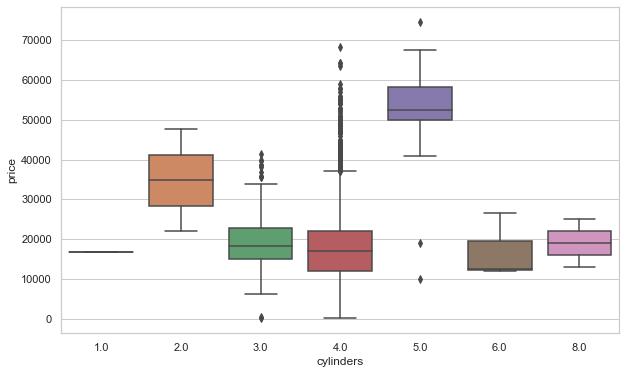

In [256]:
# Checking boxplots for cylinders column

sns.boxplot(x= "cylinders", y= "price", data=df);

In [257]:
# As a result of analysis above it was decided to fill null values in cylinders column with
# .. the mode values grouping by make_model, body_type and displacement_cc columns

df["cylinders"] = df.groupby(["make_model", "body_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.cylinders.mode()[0]))

In [259]:
# Checking the number of nulls after filling null values

df.cylinders.isnull().sum()

0

## drive_chain

In [260]:
# Checking null values

null_check("drive_chain")

Column name : drive_chain
--------------------------------
Number of nulls : 6858
Percent of nulls : % 43.08
Value_counts : 
 front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64


In [261]:
# Checking the descriptive values of drive_chain column by grouping make_model and body_type columns

df.groupby(["make_model", "body_type"]).drive_chain.describe().T

make_model Audi A1                                           Audi A2 Audi A3  \
body_type  Compact Coupe  Other Sedans Station wagon    Van Off-Road Compact   
count          687     0     12    978            18      1        1     157   
unique           2     0      1      2             1      1        1       2   
top          front   NaN  front  front         front  front    front   front   
freq           685   NaN     12    977            18      1        1     156   

make_model                                                Opel Astra        \
body_type  Convertible  Coupe  Other Sedans Station wagon    Compact Coupe   
count                4      3     10   1720           133        104     0   
unique               2      1      1      2             1          1     0   
top              front  front  front  front         front      front   NaN   
freq                 3      3     10   1703           133        104   NaN   

make_model                                      Opel Corsa                  \
body_type  Off-Road  Other Sedans Station wagon    Compact  Coupe Off-Road   
count             1      5    546           692        631      7        0   
unique            1      1      2             1          1      1        0   
top           front  front  front         front      front  front      NaN   
freq              1      5    544           692        631      7      NaN   

make_model                                Opel Insignia                        \
body_type   Other Sedans Transporter  Van       Compact Coupe Off-Road  Other   
count          10    516           6    0            10     0        6      1   
unique          1      1           1    0             1     0        2      1   
top         front  front       front  NaN         front   NaN      4WD  front   
freq           10    516           6  NaN            10   NaN        5      1   

make_model                             Renault Clio                         \
body_type  Sedans Station wagon    Van      Compact  Coupe Off-Road  Other   
count         532           956      1          214      1        1     26   
unique          3             3      1            2      1        1      1   
top         front         front  front        front  front    front  front   
freq          505           891      1          213      1        1     26   

make_model                                         Renault Duster  \
body_type  Sedans Station wagon Transporter    Van       Off-Road   
count         400           156           8      1              2   
unique          3             2           1      1              1   
top         front         front       front  front            4WD   
freq          390           155           8      1              2   

make_model Renault Espace                                             \
body_type         Compact Coupe Off-Road  Other Sedans Station wagon   
count                   1     0        3      5      5            71   
unique                  1     0        1      1      1             2   
top                 front   NaN    front  front  front         front   
freq                    1   NaN        3      5      5            70   

make_model                     
body_type  Transporter    Van  
count                7    412  
unique               2      2  
top              front  front  
freq                 6    374

In [1172]:
# Checking the mode of drive_chain column 

df.drive_chain.mode()[0]

'front'

In [263]:
# Checking the descriptive values of drive_chain column by grouping make_model

df.groupby(["make_model"]).drive_chain.describe().T

make_model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
count,1696,1,2027,1348,1170,1506,807,2,504
unique,2,1,2,2,1,3,3,1,2
top,front,front,front,front,front,front,front,4WD,front
freq,1693,1,2008,1346,1170,1409,795,2,464


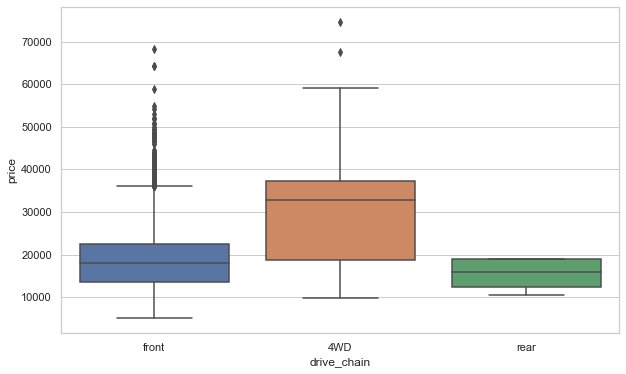

In [264]:
# Checking boxplots for drive_chain column

sns.boxplot(x= "drive_chain", y= "price", data=df);

In [265]:
# As a result of analysis above it was decided to fill null values in drive_chain column with
# .. ffill and bfill method grouping by make_model and body_type columns

df["drive_chain"] = df.groupby(["make_model", "body_type"]).drive_chain.fillna(method="ffill").fillna(method="bfill")

In [267]:
# Checking the number of nulls after filling null values

df["drive_chain"].isnull().sum()

0

## co_2_emission column

In [268]:
# Checking null values

null_check("co_2_emission")

Column name : co_2_emission
--------------------------------
Number of nulls : 2436
Percent of nulls : % 15.3
Value_counts : 
 NaN       2436
120.0      740
99.0       545
97.0       537
104.0      501
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: co_2_emission, Length: 123, dtype: int64


During data cleaning, we determined that some columns contain CO2 values.
Now let's determine whether the nulls in the co_2_emission column can be filled using these columns.

### Defining functions to check other columns to fill nulls

In [289]:
def check_other_columns(row) :
    if any(str(i) in str(row) for i in col_list) :
        return True
    else :
        False

def find_easy(col_main, col_other, pattern) :
    global col_list
    col_list = list(df[col_main].dropna().unique())
    if df[col_other].apply(check_other_columns).isnull().sum() > 0 :
        if df[col_main].dtypes == float :
            df["find"] = df[col_other].str.extract(pattern).astype(float)
        else :
            df["find"] = df[col_other].str.extract(pattern)
        x_sum = df[df[col_main].isnull()]["find"].notna().sum()
        if x_sum > 0 :
            return f"{col_other} has {x_sum} values. You can fill {col_main} with them."
        else :
            return f"There ins't any useful information in {col_other} to fill {col_main}."
        
# Don't forget to drop df["find"] column after completing the control process

### Check next_inspection column

In [392]:
# to determine pattern check the values of next_inspection column

df.next_inspection.sample(50)

3247                                                   NaN
5226                                                   NaN
4154                           12/2020,107 g CO2/km (comb)
8658                                                   NaN
5068                                                   NaN
1968                                                   NaN
2889                                                   NaN
12099                                                  NaN
5080                           03/2022,106 g CO2/km (comb)
10139                                                  NaN
14097                                                  NaN
1313                                                   NaN
8867                                                   NaN
8487                                                   NaN
14101                                                  NaN
12177                          04/2021,136 g CO2/km (comb)
14098                                                  N

In [393]:
# Execute find_easy function

find_easy("co_2_emission", "next_inspection", ",(\d+)\sg")

"There ins't any useful information in next_inspection to fill co_2_emission."

### Check inspection_new column

In [397]:
# to determine pattern check the values of inspection_new column

df.inspection_new.sample(50)

13467                                                  NaN
6805                                                   NaN
9851     Yes,,6.9 l/100 km (comb),,8.6 l/100 km (city),...
9487                               Yes,143 g CO2/km (comb)
11533                                                  NaN
4122                                                   NaN
10686                                                  Yes
8179                                                   NaN
15700                                                  NaN
2071                                                   NaN
10724                                                  NaN
3259                                Yes,99 g CO2/km (comb)
9525                                                   NaN
14869                                                  NaN
11655                                                  NaN
14817                                                  NaN
10859                                                  N

In [292]:
# Execute find_easy function

find_easy("co_2_emission", "inspection_new", ",(\d+)\sg")

"There ins't any useful information in inspection_new to fill co_2_emission."

### Check previous_owners column

In [415]:
# to determine pattern check the values of previous_owners column

df.previous_owners.sample(50)

11398                                                    1
13949                                                  NaN
11041                                                    2
5051                                                   NaN
9116                                                   NaN
6797                                                     1
15542                                                    1
4330                                                   NaN
5692                                                   NaN
14293                                                    1
2124                                                   NaN
4004                                                     1
14680                                                    1
10780                                                    1
1232                                                     1
5851                                                     1
5472                                                   N

In [296]:
# Execute find_easy function

find_easy("co_2_emission", "previous_owners", ",(\d+)\sg")

"There ins't any useful information in previous_owners to fill co_2_emission."

### Check warranty column

In [420]:
# to determine pattern check the values of warranty column

df.warranty.sample(50)

7477      12 months,95 g CO2/km (comb)
6555                               NaN
2599                         24 months
8734                               NaN
9091                               NaN
11695                           Euro 6
15877                              NaN
15252                        12 months
7108                               NaN
1690                            Euro 6
5238                               NaN
8832                  12 months,Euro 6
998      36 months,105 g CO2/km (comb)
6412                               NaN
5683                               NaN
3408                               NaN
15866                           Euro 6
6535                               NaN
1145                         12 months
12027    12 months,139 g CO2/km (comb)
4567               109 g CO2/km (comb)
9785            24 months,Euro 6d-TEMP
15720                              NaN
624                                NaN
2101                         4 (Green)
1381                     

In [418]:
# Execute find_easy function

find_easy("co_2_emission", "warranty", ",*(\d+)\sg")

"There ins't any useful information in warranty to fill co_2_emission."

### Check full_service column

In [421]:
# to determine pattern check the values of full_service column

df.full_service.sample(50)

3038                                                Euro 6
4420                                                Euro 6
9326                                                   NaN
3468                                                   NaN
15135                                               Euro 6
15560                                            4 (Green)
14930                                                  NaN
12148                                                  NaN
1815     4.4 l/100 km (comb),,5.2 l/100 km (city),,3.9 ...
12424                                                  NaN
8027                                                   NaN
9175                                                Euro 6
11653                                                  NaN
8138                                             4 (Green)
12956                                         Euro 6d-TEMP
12689                                                  NaN
7588                                                   N

In [299]:
# Execute find_easy function

find_easy("co_2_emission", "full_service", ",*(\d+)\sg")

'full_service has 1 values. You can fill co_2_emission with them.'

### Check non_smoking_vehicle column

In [1204]:
# to determine pattern check the values of non_smoking_vehicle column

df.non_smoking_vehicle.head(50)

0                     NaN
1                     NaN
2                     NaN
3                  Euro 6
4                     NaN
5                  Euro 6
6               4 (Green)
7                     NaN
8                     NaN
9                     NaN
10                    NaN
11                    NaN
12              4 (Green)
13                    NaN
14                    NaN
15                    NaN
16                    NaN
17                    NaN
18                    NaN
19                    NaN
20                    NaN
21              4 (Green)
22                    NaN
23                    NaN
24    102 g CO2/km (comb)
25                    NaN
26                    NaN
27     97 g CO2/km (comb)
28                    NaN
29                    NaN
30                    NaN
31              4 (Green)
32                    NaN
33                    NaN
34                    NaN
35                    NaN
36                 Euro 6
37                    NaN
38          

In [300]:
# Execute find_easy function

find_easy("co_2_emission", "non_smoking_vehicle", ",*(\d+)\sg")

"There ins't any useful information in non_smoking_vehicle to fill co_2_emission."

In [1208]:
# As it is seen from the results of checking other columns,
# there isn't enough value to fill co_2_emission column.

2436

In [301]:
# Checking the descriptive values of drive_chain column by grouping make_model and fuel columns

df.groupby(["make_model", "fuel"]).co_2_emission.describe().T

make_model      Audi A1                                           \
fuel            Benzine Benzine (Particulate Filter)      Diesel   
count       1496.000000                    94.000000  265.000000   
mean         106.125668                   109.702128   99.460377   
std            9.561502                     4.254864    4.750532   
min           97.000000                    97.000000   89.000000   
25%          102.000000                   108.000000   97.000000   
50%          104.000000                   110.000000   98.000000   
75%          111.000000                   111.000000  103.000000   
max          331.000000                   127.000000  110.000000   

make_model                                                 Audi A2  \
fuel       Diesel (Particulate Filter) Diesel (Particulate Filter)   
count                       449.000000                         0.0   
mean                        100.478842                         NaN   
std                           4.612688                         NaN   
min                          89.000000                         NaN   
25%                          97.000000                         NaN   
50%                         102.000000                         NaN   
75%                         104.000000                         NaN   
max                         109.000000                         NaN   

make_model     Audi A3                                            \
fuel           Benzine Benzine (Particulate Filter)       Diesel   
count       611.000000                   200.000000   790.000000   
mean        115.528642                   119.185000   107.726582   
std          14.376566                     8.209614    46.695152   
min          96.000000                   107.000000    89.000000   
25%         107.000000                   117.000000   102.000000   
50%         114.000000                   117.000000   104.000000   
75%         118.000000                   119.500000   107.000000   
max         194.000000                   189.000000  1060.000000   

make_model                                                           \
fuel       Diesel (Particulate Filter) Electric/Hybride     LPG/CNG   
count                      1114.000000              3.0   30.000000   
mean                        106.197487             36.0   97.000000   
std                           6.327151              0.0    8.784783   
min                          85.000000             36.0   91.000000   
25%                         102.000000             36.0   91.000000   
50%                         106.000000             36.0   94.000000   
75%                         109.000000             36.0   97.000000   
max                         130.000000             36.0  122.000000   

make_model    Opel Astra                                           \
fuel             Benzine Benzine (Particulate Filter)      Diesel   
count        1069.000000                    83.000000  219.000000   
mean          157.044902                   121.108434  104.867580   
std           633.343503                    19.843296   13.781579   
min            14.000000                     0.000000    5.000000   
25%           115.000000                   107.000000   96.500000   
50%           125.000000                   126.000000  104.000000   
75%           129.000000                   131.500000  119.000000   
max         12087.000000                   149.000000  141.000000   

make_model                                        Opel Corsa  \
fuel       Diesel (Particulate Filter) LPG/CNG       Benzine   
count                       715.000000     1.0   1839.000000   
mean                        106.008392   113.0    136.300163   
std                          12.590621     NaN    284.581016   
min                          87.000000   113.0     51.000000   
25%                          95.000000   113.0    123.000000   
50%                         101.000000   113.0    128.000000   
75%                    

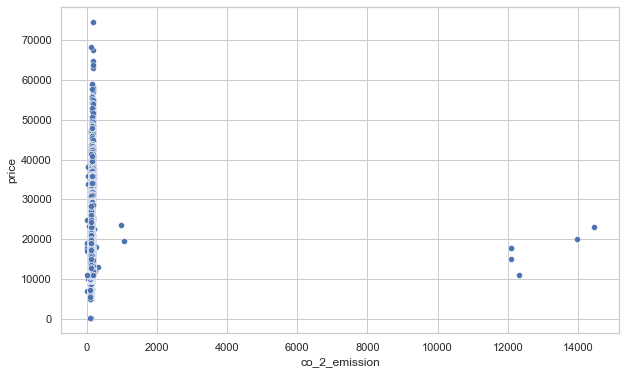

In [1210]:
sns.scatterplot(x=df.co_2_emission, y=df.price);

In [305]:
# As it is seen from the results of descriptive values,
# null values can be filled with median by grouping make_model and fuel

df["co_2_emission"] = df.groupby(["make_model", "fuel"]).co_2_emission.apply(lambda x: x.fillna(x.median()).fillna(df.co_2_emission.median()))

In [306]:
# Checking the number of nulls after filling null values

df["co_2_emission"].isnull().sum()

0

## emission_class column

In [1219]:
# Checking null values

null_check ("emission_class")

Column name : emission_class
------------------------------------------------------------
Number of nulls : 3628
Percent of nulls : % 22.79
Value_counts : 
 Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64


During data cleaning, we determined that some columns contain emission_class values. Now let's determine whether the nulls in the emission_class column can be filled using these columns.

### Check next_inspection column

In [307]:
# Execute find_easy function

find_easy("emission_class", "next_inspection", ",(E.+)")

"There ins't any useful information in next_inspection to fill emission_class."

### Check inspection_new column

In [308]:
# Execute find_easy function

find_easy("emission_class", "inspection_new", ",(E.+)")

'inspection_new has 18 values. You can fill emission_class with them.'

In [328]:
# Checking the value_counts of 18 values

df.loc[(df.emission_class.isnull()), "inspection_new"].str.extract(",(E.+)").value_counts()

Euro 6d-TEMP    14
Euro 6           4
dtype: int64

### Check previous_owners column

In [310]:
# Execute find_easy function

find_easy("emission_class", "previous_owners", ",(E.+)")

"There ins't any useful information in previous_owners to fill emission_class."

### Check warranty column

In [315]:
# Execute find_easy function

find_easy("emission_class", "warranty", ",*(E.+)")

'warranty has 125 values. You can fill emission_class with them.'

In [329]:
# Checking the value_counts of 125 values

df.loc[(df.emission_class.isnull()), "warranty"].str.extract(",*(E.+)").value_counts()

Euro 6          71
Euro 6d-TEMP    46
Euro 6c          4
Euro 6d          4
dtype: int64

### Check full_service column

In [330]:
# Execute find_easy function

find_easy("emission_class", "full_service", "(E.+)")

'full_service has 433 values. You can fill emission_class with them.'

In [332]:
# Checking the value_counts of 433 values

df.loc[(df.emission_class.isnull()), "full_service"].str.extract(",*(E.+)").value_counts()

Euro 6          310
Euro 6d-TEMP    119
Euro 6c           2
Euro 6d           2
dtype: int64

### Check non_smoking_vehicle column

In [333]:
# Execute find_easy function

find_easy("emission_class", "non_smoking_vehicle", "(E.+)")

'non_smoking_vehicle has 120 values. You can fill emission_class with them.'

In [334]:
# Checking the value_counts of 120 values

df.loc[(df.emission_class.isnull()), "non_smoking_vehicle"].str.extract(",*(E.+)").value_counts()

Euro 6          88
Euro 6d-TEMP    25
Euro 6d          5
Euro 6c          2
dtype: int64

In [335]:
# Checking the descriptive values of emission_class column by grouping make_model and fuel columns

df.groupby(["make_model", "fuel"]).emission_class.describe().T

make_model Audi A1                                       \
fuel       Benzine Benzine (Particulate Filter)  Diesel   
count         1259                           88     261   
unique           5                            2       2   
top         Euro 6                 Euro 6d-TEMP  Euro 6   
freq          1051                           80     256   

make_model                                                 Audi A2 Audi A3  \
fuel       Diesel (Particulate Filter) Diesel (Particulate Filter) Benzine   
count                              446                           1     548   
unique                               2                           1       3   
top                             Euro 6                      Euro 6  Euro 6   
freq                               444                           1     431   

make_model                                                                   \
fuel       Benzine (Particulate Filter)  Diesel Diesel (Particulate Filter)   
count                               194     748                        1093   
unique                                2       4                           5   
top                        Euro 6d-TEMP  Euro 6                      Euro 6   
freq                                118     730                        1006   

make_model                          Opel Astra                               \
fuel       Electric/Hybride LPG/CNG    Benzine Benzine (Particulate Filter)   
count                     4      29        896                           63   
unique                    1       2          5                            3   
top                  Euro 6  Euro 6     Euro 6                 Euro 6d-TEMP   
freq                      4      25        699                           51   

make_model                                             Opel Corsa  \
fuel        Diesel Diesel (Particulate Filter) LPG/CNG    Benzine   
count          195                         729       1       1629   
unique           3                           4       1          5   
top         Euro 6                      Euro 6  Euro 6     Euro 6   
freq           162                         666       1       1120   

make_model                                                                   \
fuel       Benzine (Particulate Filter)  Diesel Diesel (Particulate Filter)   
count                                19      31                          60   
unique                                3       2                           2   
top                        Euro 6d-TEMP  Euro 6                      Euro 6   
freq                                 12      30                          59   

make_model Opel Insignia                                       \
fuel             Benzine Benzine (Particulate Filter)  Diesel   
count                607                           44     359   
unique                 5                            3       6   
top               Euro 6                 Euro 6d-TEMP  Euro 6   
freq                 427                           30     326   

make_model                             Renault Clio  \
fuel       Diesel (Particulate Filter)      Benzine   
count                              917          886   
unique                               6            6   
top                             Euro 6       Euro 6   
freq                               767          785   

make_model                                                                   \
fuel       Benzine (Particulate Filter)  Diesel Diesel (Particulate Filter)   
count                                 1     152                         312   
unique                                1       3                           5   
top                              Euro 6  Euro 6                      Euro 6   
freq                                  1     143                         295   

make_model                  Renault Duster Renault Espace  \
fuel       Electric/Hybride        Benzine        Benzine   
count            

In [336]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model and fuel

df["emission_class"] = df.groupby(["make_model", "fuel"]).emission_class.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.emission_class.mode()[0]))

In [337]:
# Checking the number of nulls after filling null values

df["emission_class"].isnull().sum()

0

## comfort_convenience

In [342]:
# Checking null values

null_check("comfort_convenience")

Column name : comfort_convenience
--------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   280
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                                                                                                        

In [343]:
# Checking the descriptive values of comfort_convenience column by grouping make_model, body_type and age columns

df.groupby(["make_model","body_type", "age"]).comfort_convenience.describe().T

make_model                                            Audi A1  \
body_type                                             Compact   
age                                                       0.0   
count                                                     377   
unique                                                    123   
top         Air conditioning,Armrest,Automatic climate con...   
freq                                                       50   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                     267   
unique                                                    124   
top         Air conditioning,Armrest,Automatic climate con...   
freq                                                       46   

make_model                                                     \
body_type                                                       
age                                                       2.0   
count                                                     161   
unique                                                     85   
top         Air conditioning,Armrest,Automatic climate con...   
freq                                                       32   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                     234   
unique                                                    164   
top         Air conditioning,Armrest,Automatic climate con...   
freq                                                       33   

make_model                                                     \
body_type                                               Coupe   
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         Air conditioning,Air suspension,Armrest,Auxili...   
freq                                                        1   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                       1   
unique                                                      1   
top         Air conditioning,Cruise control,Electrically h...   
freq                                                        1   

make_model                                                     \
body_type                                               Other   
age                                                       0.0   
count                                                       9   
unique                                                      5   
top         Air conditioning,Automatic climate control,Cru...   
freq                                                        5   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                       3   
unique                                                      2   
top         Air conditioning,Armrest,Electrical side mirro...   
freq                                                        2   

make_model                                                     \
body_type                                                       
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         Air conditionin

In [344]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model, body_type and age columns

df["comfort_convenience"] = df.groupby(["make_model","body_type", "age"]).comfort_convenience.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.comfort_convenience.mode()[0]))

In [345]:
# Checking the number of nulls after filling null values

df["comfort_convenience"].isnull().sum()

0

## entertainment_media column

In [1258]:
# Checking null values

null_check("entertainment_media")

Column name : entertainment_media
------------------------------------------------------------
Number of nulls : 1374
Percent of nulls : % 8.63
Value_counts : 
 NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1

In [1259]:
# Checking the descriptive values of entertainment_media column by grouping make_model, body_type and age columns

df.groupby(["make_model","body_type", "age"]).entertainment_media.describe().T

make_model                                            Audi A1  \
body_type                                             Compact   
age                                                       0.0   
count                                                     342   
unique                                                     75   
top         Bluetooth,CD player,Hands-free equipment,MP3,O...   
freq                                                       50   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                     258   
unique                                                     51   
top         Bluetooth,CD player,Hands-free equipment,MP3,O...   
freq                                                       42   

make_model                                                     \
body_type                                                       
age                                                       2.0   
count                                                     156   
unique                                                     42   
top         Bluetooth,CD player,Hands-free equipment,On-bo...   
freq                                                       32   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                     226   
unique                                                     52   
top         Bluetooth,CD player,Hands-free equipment,On-bo...   
freq                                                       31   

make_model                                                     \
body_type                                               Coupe   
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         CD player,Hands-free equipment,MP3,On-board co...   
freq                                                        1   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                       1   
unique                                                      1   
top         Bluetooth,CD player,Hands-free equipment,On-bo...   
freq                                                        1   

make_model                                        \
body_type                                  Other   
age                                          0.0   
count                                          9   
unique                                         3   
top         CD player,Hands-free equipment,Radio   
freq                                           5   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                       3   
unique                                                      3   
top         Bluetooth,Hands-free equipment,On-board comput...   
freq                                                        1   

make_model                                      \
body_type                               Sedans   
age                                 2.0    0.0   
count                                 1    394   
unique                                1     79   
top         CD player,On-board computer  Radio   
freq                                  1     55   

make_model                                                            \
body_type           

In [346]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model, body_type and age columns

df["entertainment_media"] = df.groupby(["make_model","body_type", "age"]).entertainment_media.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.entertainment_media.mode()[0]))

In [347]:
# Checking the number of nulls after filling null values

df["entertainment_media"].isnull().sum()

0

## extras columns

In [348]:
# Checking null values

null_check("extras")

Column name : extras
--------------------------------
Number of nulls : 2962
Percent of nulls : % 18.61
Value_counts : 
 Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch             

In [349]:
# Checking the descriptive values of extras column by grouping make_model, body_type and age columns

df.groupby(["make_model","body_type", "age"]).extras.describe().T

make_model       Audi A1                                            \
body_type        Compact                                             
age                  0.0           1.0           2.0           3.0   
count                320           248           147           214   
unique                51            46            35            43   
top         Alloy wheels  Alloy wheels  Alloy wheels  Alloy wheels   
freq                  65            34            39            47   

make_model                                                     \
body_type                                               Coupe   
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         Alloy wheels,Catalytic Converter,Sport seats,S...   
freq                                                        1   

make_model                                                                \
body_type                                            Other                 
age                                      3.0           0.0           1.0   
count                                      1             9             3   
unique                                     1             5             2   
top         Alloy wheels,Catalytic Converter  Alloy wheels  Alloy wheels   
freq                                       1             5             2   

make_model                                                                   \
body_type                                Sedans                               
age                           2.0           0.0           1.0           2.0   
count                           1           364           433           226   
unique                          1            61            60            57   
top         Roof rack,Sport seats  Alloy wheels  Alloy wheels  Alloy wheels   
freq                            1           175           107            58   

make_model                                                                   \
body_type                                                     Station wagon   
age                  3.0                                                0.0   
count                342                                                  1   
unique                61                                                  1   
top         Alloy wheels  Alloy wheels,Sport package,Sport seats,Voice C...   
freq                  82                                                  1   

make_model                                                      \
body_type                                                        
age                              1.0                       2.0   
count                             10                         3   
unique                             5                         3   
top         Alloy wheels,Sport seats  Alloy wheels,Sport seats   
freq                               6                         1   

make_model                                                          \
body_type                                                      Van   
age                                                       3.0  0.0   
count                                                       5    0   
unique                                                      5    0   
top         Alloy wheels,Sport package,Sport seats,Sport s...  NaN   
freq                                                        1  NaN   

make_model       Audi A2                                    Audi A3  \
body_type       Off-Road                                    Compact   
age                  1.0                                        0.0   
count                  1                                         17   
unique                 1                                          7   
top         Alloy wheels  Alloy wheels,Sport seats,Sport suspension   
freq                   1        

In [350]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model, body_type and age columns

df["extras"] = df.groupby(["make_model","body_type", "age"]).extras.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.extras.mode()[0]))

In [351]:
# Checking the number of nulls after filling null values

df["extras"].isnull().sum()

0

## safety_security column

In [1264]:
# Checking null values

null_check("safety_security")

Column name : safety_security
------------------------------------------------------------
Number of nulls : 982
Percent of nulls : % 6.17
Value_counts : 
 NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side a

In [1265]:
# Checking the descriptive values of safety_security column by grouping make_model, body_type and age columns

df.groupby(["make_model","body_type", "age"]).safety_security.describe().T

make_model                                            Audi A1  \
body_type                                             Compact   
age                                                       0.0   
count                                                     344   
unique                                                    119   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       30   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                     260   
unique                                                     77   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       39   

make_model                                                     \
body_type                                                       
age                                                       2.0   
count                                                     157   
unique                                                     67   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       29   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                     228   
unique                                                     83   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       53   

make_model                                                     \
body_type                                               Coupe   
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         ABS,Adaptive Cruise Control,Adaptive headlight...   
freq                                                        1   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                       1   
unique                                                      1   
top         ABS,Adaptive Cruise Control,Central door lock,...   
freq                                                        1   

make_model                                                     \
body_type                                               Other   
age                                                       0.0   
count                                                       9   
unique                                                      5   
top         Electronic stability control,Fog lights,Immobi...   
freq                                                        5   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                       3   
unique                                                      3   
top         ABS,Daytime running lights,Driver-side airbag,...   
freq                                                        1   

make_model                                                     \
body_type                                                       
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         Adaptive Cruise

In [455]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model, body_type and age columns

df["safety_security"] = df.groupby(["make_model","body_type", "age"]).safety_security.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.safety_security.mode()[0]))

In [456]:
# Checking the number of nulls after filling null values

df["safety_security"].isnull().sum()

0

## gears column

In [1274]:
# Checking null values

null_check("gears")

Column name : gears
------------------------------------------------------------
Number of nulls : 4712
Percent of nulls : % 29.6
Value_counts : 
 6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64


In [1276]:
# Checking the descriptive values of gears column by grouping make_model, body_type and gearing_type columns

df.groupby(["make_model","body_type", "gearing_type"]).gears.describe().T

make_model       Audi A1                                                     \
body_type        Compact                             Coupe     Other          
gearing_type   Automatic      Manual Semi-automatic Manual Automatic Manual   
count         209.000000  354.000000            3.0    1.0       3.0    4.0   
mean            6.947368    5.217514            7.0    5.0       7.0    5.0   
std             0.297595    0.413139            0.0    NaN       0.0    0.0   
min             5.000000    5.000000            7.0    5.0       7.0    5.0   
25%             7.000000    5.000000            7.0    5.0       7.0    5.0   
50%             7.000000    5.000000            7.0    5.0       7.0    5.0   
75%             7.000000    5.000000            7.0    5.0       7.0    5.0   
max             8.000000    6.000000            7.0    5.0       7.0    5.0   

make_model                                                          \
body_type                        Sedans                              
gearing_type Semi-automatic   Automatic      Manual Semi-automatic   
count                   1.0  421.000000  599.000000      52.000000   
mean                    7.0    6.909739    5.151920       6.980769   
std                     NaN    0.392095    0.363868       0.138675   
min                     7.0    5.000000    5.000000       6.000000   
25%                     7.0    7.000000    5.000000       7.000000   
50%                     7.0    7.000000    5.000000       7.000000   
75%                     7.0    7.000000    5.000000       7.000000   
max                     7.0    8.000000    7.000000       7.000000   

make_model                                       Audi A2    Audi A3  \
body_type    Station wagon                  Van Off-Road    Compact   
gearing_type     Automatic     Manual Automatic   Manual  Automatic   
count                  3.0  11.000000       1.0      0.0  60.000000   
mean                   7.0   5.090909       6.0      NaN   6.933333   
std                    0.0   0.301511       NaN      NaN   0.251549   
min                    7.0   5.000000       6.0      NaN   6.000000   
25%                    7.0   5.000000       6.0      NaN   7.000000   
50%                    7.0   5.000000       6.0      NaN   7.000000   
75%                    7.0   5.000000       6.0      NaN   7.000000   
max                    7.0   6.000000       6.0      NaN   7.000000   

make_model                                                                   \
body_type                              Convertible                    Coupe   
gearing_type     Manual Semi-automatic   Automatic Semi-automatic Automatic   
count         89.000000      14.000000         3.0       5.000000       4.0   
mean           6.000000       6.928571         7.0       6.600000       7.0   
std            0.150756       0.267261         0.0       0.547723       0.0   
min            5.000000       6.000000         7.0       6.000000       7.0   
25%            6.000000       7.000000         7.0       6.000000       7.0   
50%            6.000000       7.000000         7.0       7.000000       7.0   
75%            6.000000       7.000000         7.0       7.000000       7.0   
max            7.000000       7.000000         7.0       7.000000       7.0   

make_model                                                            \
body_type        Other                            Sedans               
gearing_type Automatic Manual Semi-automatic   Automatic      Manual   
count              5.0    5.0            3.0  857.000000  938.000000   
mean               7.0    6.0            7.0    6.915986    6.006397   
std                0.0    0.0            0.0    0.277571    0.092179   
min                7.0    6.0            7.0    6.000000    5.000000   
25%                7.0    6.0            7.0    7.000000    6.000000   
50%                7.0    6.0            7.0    7.000000    6.000000   
75%                7.0    6.0            7.0    7.000000   

In [357]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model, body_type and gearing_type columns

df["gears"] = df.groupby(["make_model","body_type", "gearing_type"]).gears.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.gears.mode()[0]))

In [360]:
# Checking the number of nulls after filling null values

df["gears"].isnull().sum()

0

## hp_kw column

In [1279]:
# Checking null values

null_check("hp_kw")

Column name : hp_kw
------------------------------------------------------------
Number of nulls : 88
Percent of nulls : % 0.55
Value_counts : 
 85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
70.0      888
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      345
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
NaN        88
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
78.0       20
1.0        20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
149.0       3
80.0        3
168.0       3
98.0        3
93.0        3
228.0       2
270.0       2
53.0        2
140.0       2
86.0        2
1

In [1280]:
# Checking the descriptive values of hp_kw column by grouping make_model, displacement_cc, cylinders and fuel columns

df.groupby(["make_model", "displacement_cc", "cylinders", "fuel"]).hp_kw.describe().T

make_model      Audi A1                                                       \
displacement_cc 300.0      900.0        1000.0                                 
cylinders           4.0        4.0          3.0                                
fuel            Benzine    Benzine      Benzine Benzine (Particulate Filter)   
count               1.0   5.000000  1478.000000                    92.000000   
mean               85.0  62.000000    74.192828                    82.554348   
std                 NaN   4.472136     8.397296                     5.571442   
min                85.0  60.000000    60.000000                    70.000000   
25%                85.0  60.000000    70.000000                    85.000000   
50%                85.0  60.000000    70.000000                    85.000000   
75%                85.0  60.000000    85.000000                    85.000000   
max                85.0  70.000000    92.000000                    85.000000   

make_model                                                          \
displacement_cc                                1200.0      1400.0    
cylinders                          4.0     8.0     4.0         3.0   
fuel                Diesel     Benzine Benzine Benzine     Benzine   
count             2.000000   13.000000     1.0     1.0   72.000000   
mean             77.500000   76.153846    70.0    70.0   92.347222   
std              10.606602   20.529841     NaN     NaN    4.987759   
min              70.000000   60.000000    70.0    70.0   66.000000   
25%              73.750000   70.000000    70.0    70.0   92.000000   
50%              77.500000   70.000000    70.0    70.0   92.000000   
75%              81.250000   70.000000    70.0    70.0   92.000000   
max              85.000000  140.000000    70.0    70.0  112.000000   

make_model                                                           \
displacement_cc                                                       
cylinders                                                       4.0   
fuel                 Diesel Diesel (Particulate Filter)     Benzine   
count            169.000000                       300.0  117.000000   
mean              66.071006                        66.0   93.854701   
std                0.257598                         0.0    5.482362   
min               66.000000                        66.0   92.000000   
25%               66.000000                        66.0   92.000000   
50%               66.000000                        66.0   92.000000   
75%               66.000000                        66.0   92.000000   
max               67.000000                        66.0  110.000000   

make_model                                           \
displacement_cc                             1500.0    
cylinders                                       4.0   
fuel            Diesel (Particulate Filter) Benzine   
count                                   2.0    13.0   
mean                                   66.0   110.0   
std                                     0.0     0.0   
min                                    66.0   110.0   
25%                                    66.0   110.0   
50%                                    66.0   110.0   
75%                                    66.0   110.0   
max                                    66.0   110.0   

make_model                                            \
displacement_cc                              1600.0    
cylinders                                        3.0   
fuel            Benzine (Particulate Filter)  Diesel   
count                                    3.0     1.0   
mean                                   110.0    85.0   
std                                      0.0     NaN   
min                                    110.0    85.0   
25%                                    110.0    85.0   
50%                                    110.0    85.0   
75%                                    110.0    85.0   
max                                    110.0    85.0   

make_model 

In [359]:
# As it is seen from the results of above null values can be filled with median by grouping make_model, displacement_cc, cylinders and fuel columns

df["hp_kw"] = df.groupby(["make_model", "displacement_cc", "cylinders", "fuel"]).hp_kw.apply(lambda x : x.fillna(x.median()).fillna(df.hp_kw.median()))

In [361]:
# Checking the number of nulls after filling null values

df["hp_kw"].isnull().sum()

0

## upholstery_type column

In [363]:
# Checking null values

null_check("upholstery_type")

Column name : upholstery_type
--------------------------------
Number of nulls : 4871
Percent of nulls : % 30.6
Value_counts : 
 Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64


In [364]:
# Checking the descriptive values of upholstery_type column by grouping make_model

df.groupby("make_model").upholstery_type.describe()

,count,unique,top,freq
make_model,,,,
Audi A1,1880,5,Cloth,1696
Audi A2,1,1,Cloth,1
Audi A3,2007,5,Cloth,1610
Opel Astra,1858,5,Cloth,1519
Opel Corsa,1713,5,Cloth,1675
Opel Insignia,1938,5,Cloth,956
Renault Clio,1040,5,Cloth,839
Renault Duster,18,1,Cloth,18
Renault Espace,593,4,Full leather,303


In [365]:
# Checking the descriptive values of upholstery_type column by grouping make_model and body_type columns

df.groupby(["make_model", "body_type"]).upholstery_type.describe()

count unique           top  freq
make_model     body_type                                     
Audi A1        Compact         883      5         Cloth   807
               Coupe             1      1  Part leather     1
               Other            12      1         Cloth    12
               Sedans          967      5         Cloth   862
               Station wagon    17      2         Cloth    15
               Van               0      0           NaN   NaN
Audi A2        Off-Road          1      1         Cloth     1
Audi A3        Compact          78      3         Cloth    44
               Convertible       5      2  Part leather     3
               Coupe             3      1         Cloth     3
               Other            10      3         Cloth     5
               Sedans         1681      5         Cloth  1369
               Station wagon   230      5         Cloth   187
Opel Astra     Compact          67      4         Cloth    57
               Coupe             2      2  Part leather     1
               Off-Road          1      1  Part leather     1
               Other             5      1         Cloth     5
               Sedans          854      5         Cloth   737
               Station wagon   929      5         Cloth   719
Opel Corsa     Compact        1086      3         Cloth  1066
               Coupe             5      1         Cloth     5
               Off-Road          0      0           NaN   NaN
               Other            11      2         Cloth    10
               Sedans          607      4         Cloth   590
               Transporter       4      1         Cloth     4
               Van               0      0           NaN   NaN
Opel Insignia  Compact          17      3  Full leather     9
               Coupe             0      0           NaN   NaN
               Off-Road          3      3  Full leather     1
               Other             4      2  Part leather     3
               Sedans          601      4         Cloth   320
               Station wagon  1312      5         Cloth   631
               Van               1      1         Cloth     1
Renault Clio   Compact         310      4         Cloth   221
               Coupe             1      1  Full leather     1
               Off-Road          2      1         Cloth     2
               Other             9      3         Cloth     4
               Sedans          494      5         Cloth   404
               Station wagon   213      5         Cloth   197
               Transporter       9      1         Cloth     9
               Van               2      1         Cloth     2
Renault Duster Off-Road         18      1         Cloth    18
Renault Espace Compact           1      1         Cloth     1
               Coupe             0      0           NaN   NaN
               Off-Road          7      3  Full leather     3
               Other             7      2  Part leather     4
               Sedans           16      3  Part leather    10
               Station wagon    51      3  Full leather    34
               Transporter      12      3  Full leather     6
               Van             499      4  Full leather   252

In [366]:
# Checking the descriptive values of upholstery_type column by grouping make_model, body_type and upholstery_color columns

df.groupby(["make_model", "body_type", "upholstery_color"]).upholstery_type.describe().T

make_model       Audi A1                                                   \
body_type        Compact                              Coupe  Other Sedans   
upholstery_color   Black   Blue   Grey  Other         Other  Black  Black   
count                674      2    102     57             1      6    743   
unique                 5      1      3      1             1      1      5   
top                Cloth  Cloth  Cloth  Cloth  Part leather  Cloth  Cloth   
freq                 611      2    100     57             1      6    651   

make_model                                                                \
body_type                                                  Station wagon   
upholstery_color   Blue   Grey Orange  Other    Red  White         Black   
count                 4    136      1     49      3      1            16   
unique                1      5      1      1      2      1             2   
top               Cloth  Cloth  Cloth  Cloth  Cloth  Cloth         Cloth   
freq                  4    128      1     49      2      1            14   

make_model                     Audi A2 Audi A3                              \
body_type                 Van Off-Road Compact                 Convertible   
upholstery_color    Red Black    Black   Black   Grey  Other         Black   
count                 1     0        1      66      7      4             2   
unique                1     0        1       3      1      1             2   
top               Cloth   NaN    Cloth   Cloth  Cloth  Cloth  Part leather   
freq                  1   NaN        1      33      7      4             1   

make_model                                                                 \
body_type                              Coupe  Other                Sedans   
upholstery_color         Brown  Other  Black  Black    Grey         Beige   
count                        1      1      3      5       3             2   
unique                       1      1      1      2       2             2   
top               Part leather  Cloth  Cloth  Cloth  Velour  Part leather   
freq                         1      1      3      4       2             1   

make_model                                                              \
body_type                                                                
upholstery_color  Black Blue         Brown   Grey  Other  White Yellow   
count              1121    0            13    206    165      1      0   
unique                5    0             3      5      4      1      0   
top               Cloth  NaN  Full leather  Cloth  Cloth  Cloth    NaN   
freq                894  NaN             8    175    156      1    NaN   

make_model                                                 Opel Astra         \
body_type        Station wagon                                Compact          
upholstery_color         Black   Blue   Grey         Other      Beige  Black   
count                      157      1      7            28          1     36   
unique                       5      1      1             3          1      4   
top                      Cloth  Cloth  Cloth  Part leather      Cloth  Cloth   
freq                       131      1      7            16          1     28   

make_model                                                                \
body_type                              Coupe             Off-Road  Other   
upholstery_color   Grey  Other         Black  Other          Grey  Black   
count                 3      3             1      1             1      4   
unique                1      1             1      1             1      1   
top               Cloth  Cloth  Part leather  Cloth  Part leather  Cloth   
freq                  3      3             1      1             1      4   

make_model                                                               \
body_type                     Sedans                      Station wagon   
upholstery_color   Grey Other  Beige  Black   Grey  Other         Beige   
co

In [367]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model and body_type columns

df["upholstery_type"] = df.groupby(["make_model", "body_type"]).upholstery_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_type.mode()[0]))

In [368]:
# Checking the number of nulls after filling null values

df["upholstery_type"].isnull().sum()

0

## upholstery_color column

In [1291]:
# Checking null values

null_check("upholstery_color")

Column name : upholstery_color
------------------------------------------------------------
Number of nulls : 5022
Percent of nulls : % 31.55
Value_counts : 
 Black     8201
NaN       5022
Grey      1376
Other     1016
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64


In [1292]:
# Checking the descriptive values of upholstery_color column by grouping make_model

df.groupby("make_model").upholstery_color.describe()

,count,unique,top,freq
make_model,,,,
Audi A1,1933,7,Black,1533
Audi A2,1,1,Black,1
Audi A3,2034,8,Black,1473
Opel Astra,1819,7,Black,1420
Opel Corsa,1603,6,Black,1291
Opel Insignia,1939,8,Black,1570
Renault Clio,1006,5,Black,708
Renault Duster,18,2,Grey,16
Renault Espace,544,7,Black,203


In [338]:
# Checking the descriptive values of upholstery_type column by grouping make_model, body_type and upholstery_type columns

df.groupby(["make_model", "body_type", "upholstery_type"]).upholstery_color.describe().T

make_model      Audi A1                                             \
body_type       Compact                                              
upholstery_type   Cloth Full leather Part leather Velour alcantara   
count               770            6           46      6         7   
unique                4            1            2      2         1   
top               Black        Black        Black  Black     Black   
freq                611            6           45      5         7   

make_model                                                                   \
body_type              Coupe  Other Sedans                                    
upholstery_type Part leather  Cloth  Cloth Full leather Part leather Velour   
count                      1      6    836           16           65     10   
unique                     1      1      7            3            2      2   
top                    Other  Black  Black        Black        Black  Black   
freq                       1      6    651           13           62      8   

make_model                                            Audi A2 Audi A3  \
body_type                 Station wagon              Off-Road Compact   
upholstery_type alcantara         Cloth Part leather    Cloth   Cloth   
count                  10            15            2        1      44   
unique                  2             2            1        1       3   
top                 Black         Black        Black    Black   Black   
freq                    9            14            2        1      33   

make_model                                                                 \
body_type                                 Convertible               Coupe   
upholstery_type Full leather Part leather       Cloth Part leather  Cloth   
count                     19           14           2            2      3   
unique                     1            1           2            2      1   
top                    Black        Black       Other        Brown  Black   
freq                      19           14           1            1      3   

make_model                                                                   \
body_type        Other                     Sedans                             
upholstery_type  Cloth Part leather Velour  Cloth Full leather Part leather   
count                5            0      3   1229           54          207   
unique               2            0      2      6            4            5   
top              Black          NaN   Grey  Black        Black        Black   
freq                 4          NaN      2    894           39          175   

make_model                                                                \
body_type                        Station wagon                             
upholstery_type Velour alcantara         Cloth Full leather Part leather   
count                9         9           150            4           37   
unique               2         3             4            2            2   
top              Black     Black         Black        Black        Black   
freq                 7         6           131            3           21   

make_model                       Opel Astra                            \
body_type                           Compact                             
upholstery_type Velour alcantara      Cloth Full leather Part leather   
count                1         1         35            4            2   
unique               1         1          4            1            1   
top              Black     Black      Black        Black        Black   
freq                 1         1         28            4            2   

make_model                                                                \
body_type                  Coupe                  Off-Road  Other Sedans   
upholstery_type alcantara  Cloth Part leather Part leather  Cloth  Cloth   
count                   2      1            1            1      5    612   


In [369]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model, body_type and upholstery_type columns

df["upholstery_color"] = df.groupby(["make_model", "body_type", "upholstery_type"]).upholstery_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_color.mode()[0]))

In [370]:
# Checking the number of nulls after filling null values

df["upholstery_color"].isnull().sum()

0

## weight_kg column

In [1296]:
# Checking null values

null_check("weight_kg")

Column name : weight_kg
------------------------------------------------------------
Number of nulls : 6974
Percent of nulls : % 43.81
Value_counts : 
 NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1960.0       1
1258.0       1
1167.0       1
1331.0       1
2037.0       1
Name: weight_kg, Length: 435, dtype: int64


In [1297]:
# Checking the descriptive values of weight_kg column by grouping make_model, body_type and displacement_cc columns

df.groupby(["make_model", "body_type", "displacement_cc"]).weight_kg.describe().T

make_model      Audi A1                                                 \
body_type       Compact                                                  
displacement_cc 300.0   900.0        1000.0       1400.0       1500.0    
count               1.0     0.0   367.000000    96.000000    12.000000   
mean             1200.0     NaN  1158.038147  1184.114583  1215.000000   
std                 NaN     NaN    94.772484    45.329175    30.895719   
min              1200.0     NaN   102.000000  1105.000000  1180.000000   
25%              1200.0     NaN  1135.000000  1165.000000  1180.000000   
50%              1200.0     NaN  1165.000000  1195.000000  1240.000000   
75%              1200.0     NaN  1180.000000  1195.000000  1240.000000   
max              1200.0     NaN  1675.000000  1345.000000  1240.000000   

make_model                                                                 \
body_type                                                   Coupe           
displacement_cc      1600.0  1800.0       2000.0  9800.0  1000.0  1600.0    
count              31.000000     0.0     5.000000     1.0     1.0     0.0   
mean             1307.161290     NaN  1273.000000  1200.0  1010.0     NaN   
std               153.310599     NaN    84.896996     NaN     NaN     NaN   
min              1125.000000     NaN  1180.000000  1200.0  1010.0     NaN   
25%              1250.000000     NaN  1180.000000  1200.0  1010.0     NaN   
50%              1250.000000     NaN  1335.000000  1200.0  1010.0     NaN   
75%              1275.000000     NaN  1335.000000  1200.0  1010.0     NaN   
max              1792.000000     NaN  1335.000000  1200.0  1010.0     NaN   

make_model                                                              \
body_type              Other               Sedans                        
displacement_cc      1000.0  1600.0       1000.0  1200.0       1400.0    
count               3.000000     1.0   559.000000     0.0   206.000000   
mean             1200.000000  1250.0  1243.957066     NaN  1246.019417   
std                32.787193     NaN   185.624891     NaN   138.775902   
min              1165.000000  1250.0  1035.000000     NaN  1120.000000   
25%              1185.000000  1250.0  1135.000000     NaN  1195.000000   
50%              1205.000000  1250.0  1165.000000     NaN  1205.000000   
75%              1217.500000  1250.0  1230.000000     NaN  1220.000000   
max              1230.000000  1250.0  1680.000000     NaN  1665.000000   

make_model                                                                    \
body_type                                                      Station wagon   
displacement_cc 1500.0       1600.0       1800.0       2000.0        1000.0    
count               1.0   148.000000     8.000000     3.000000      3.000000   
mean             1655.0  1330.912162  1323.750000  1303.333333   1355.000000   
std                 NaN   172.429654   154.544261    54.848276    222.542131   
min              1655.0  1175.000000  1255.000000  1240.000000   1135.000000   
25%              1655.0  1250.000000  1255.000000  1287.500000   1242.500000   
50%              1655.0  1275.000000  1280.000000  1335.000000   1350.000000   
75%              1655.0  1275.000000  1280.000000  1335.000000   1465.000000   
max              1655.0  1720.000000  1705.000000  1335.000000   1580.000000   

make_model                                    Audi A2      Audi A3          \
body_type                                Van Off-Road      Compact           
displacement_cc      1400.0  1600.0  2000.0   1600.0       1000.0  1200.0    
count              11.000000     0.0     0.0      0.0    15.000000     0.0   
mean             1194.090909     NaN     NaN      NaN  1176.600000     NaN   
std                27.001683     NaN     NaN      NaN    37.661652     NaN   
min              1125.000000     NaN     NaN      NaN  1155.000000     NaN   
25%              1195.000000     NaN     NaN      NaN  1155.000000     NaN   
50%              

In [1298]:
# Checking the descriptive values of weight_kg column by grouping make_model and body_type columns

df.groupby(["make_model", "body_type"]).weight_kg.describe().T

make_model      Audi A1                                                       \
body_type       Compact   Coupe        Other       Sedans Station wagon  Van   
count        513.000000     1.0     4.000000   925.000000     14.000000  0.0   
mean        1174.545809  1010.0  1212.500000  1259.656216   1228.571429  NaN   
std           98.329734     NaN    36.628768   176.672756    113.466847  NaN   
min          102.000000  1010.0  1165.000000  1035.000000   1125.000000  NaN   
25%         1135.000000  1010.0  1195.000000  1145.000000   1195.000000  NaN   
50%         1180.000000  1010.0  1217.500000  1195.000000   1205.000000  NaN   
75%         1200.000000  1010.0  1235.000000  1255.000000   1215.000000  NaN   
max         1792.000000  1010.0  1250.000000  1720.000000   1580.000000  NaN   

make_model  Audi A2      Audi A3                                         \
body_type  Off-Road      Compact  Convertible        Coupe        Other   
count           0.0   157.000000     7.000000     3.000000     3.000000   
mean            NaN  1314.636943  1519.285714  1260.000000  1318.333333   
std             NaN   160.671593   129.113276    17.320508   100.166528   
min             NaN  1155.000000  1355.000000  1250.000000  1205.000000   
25%             NaN  1260.000000  1415.000000  1250.000000  1280.000000   
50%             NaN  1280.000000  1555.000000  1250.000000  1355.000000   
75%             NaN  1290.000000  1605.000000  1265.000000  1375.000000   
max             NaN  1890.000000  1685.000000  1280.000000  1395.000000   

make_model                              Opel Astra                   \
body_type        Sedans Station wagon      Compact   Coupe Off-Road   
count       1627.000000    113.000000   113.000000     1.0      1.0   
mean        1395.619545   1318.362832  1302.548673  1350.0   1340.0   
std          172.074921     72.430516    75.356177     NaN      NaN   
min         1041.000000   1180.000000  1163.000000  1350.0   1340.0   
25%         1310.000000   1265.000000  1263.000000  1350.0   1340.0   
50%         1350.000000   1335.000000  1325.000000  1350.0   1340.0   
75%         1365.000000   1365.000000  1360.000000  1350.0   1340.0   
max         1905.000000   1585.000000  1503.000000  1350.0   1340.0   

make_model                                           Opel Corsa               \
body_type         Other       Sedans Station wagon      Compact        Coupe   
count         54.000000   500.000000    596.000000   508.000000    10.000000   
mean        1325.407407  1328.364000   1403.741611  1174.057087  1203.000000   
std           51.711653    86.029772    129.147536    91.265585   161.726106   
min         1263.000000  1188.000000   1178.000000     1.000000  1066.000000   
25%         1278.000000  1273.000000   1337.000000  1163.000000  1120.000000   
50%         1350.000000  1308.000000   1393.000000  1163.000000  1159.500000   
75%         1360.000000  1360.000000   1425.000000  1199.000000  1199.000000   
max         1503.000000  1900.000000   1985.000000  1665.000000  1635.000000   

make_model                                                              \
body_type      Off-Road        Other       Sedans  Transporter     Van   
count          3.000000    79.000000   634.000000     6.000000     2.0   
mean        1187.666667  1169.253165  1171.566246  1181.000000  1124.0   
std           42.723920    18.735314    78.367382    19.718012     0.0   
min         1163.000000  1141.000000  1086.000000  1163.000000  1124.0   
25%         1163.000000  1163.000000  1141.000000  1163.000000  1124.0   
50%         1163.000000  1163.000000  1163.000000  1181.000000  1124.0   
75%         1200.000000  1163.000000  1173.000000  1199.000000  1124.0   
max         1237.000000  1237.000000  1960.000000  1199.000000  1124.0   

make_model Opel Insignia                                               \
body_type        Compact Coupe     Off-Road        Other       Sedans   
count           20.00000   0.0     6.000000    39

In [1299]:
# Checking the descriptive values of weight_kg column by grouping make_model and displacement_cc columns

df.groupby(["make_model", "displacement_cc"]).weight_kg.describe().T

make_model      Audi A1                                            \
displacement_cc 300.0   900.0        1000.0  1200.0       1400.0    
count               1.0     0.0   933.000000     0.0   313.000000   
mean             1200.0     NaN  1210.125402     NaN  1225.207668   
std                 NaN     NaN   161.651138     NaN   118.923045   
min              1200.0     NaN   102.000000     NaN  1105.000000   
25%              1200.0     NaN  1135.000000     NaN  1180.000000   
50%              1200.0     NaN  1165.000000     NaN  1195.000000   
75%              1200.0     NaN  1200.000000     NaN  1215.000000   
max              1200.0     NaN  1680.000000     NaN  1665.000000   

make_model                                                                   \
displacement_cc      1500.0       1600.0       1800.0       2000.0  9800.0    
count              13.000000   180.000000     8.000000     8.000000     1.0   
mean             1248.846154  1326.372222  1323.750000  1284.375000  1200.0   
std               125.567941   168.729231   154.544261    72.281073     NaN   
min              1180.000000  1125.000000  1255.000000  1180.000000  1200.0   
25%              1180.000000  1250.000000  1255.000000  1225.000000  1200.0   
50%              1240.000000  1250.000000  1280.000000  1335.000000  1200.0   
75%              1240.000000  1275.000000  1280.000000  1335.000000  1200.0   
max              1655.000000  1792.000000  1705.000000  1335.000000  1200.0   

make_model      Audi A2      Audi A3                                       \
displacement_cc 1600.0       1000.0     1200.0       1400.0       1500.0    
count               0.0   298.000000    10.0000   110.000000   112.000000   
mean                NaN  1327.003356  1241.0000  1322.454545  1341.464286   
std                 NaN   184.487195    34.9444   102.159583    96.394734   
min                 NaN  1155.000000  1180.0000  1195.000000  1135.000000   
25%                 NaN  1255.000000  1232.5000  1280.000000  1325.000000   
50%                 NaN  1265.000000  1255.0000  1287.500000  1325.000000   
75%                 NaN  1280.000000  1255.0000  1350.000000  1345.000000   
max                 NaN  1790.000000  1275.0000  1765.000000  1800.000000   

make_model                                                             \
displacement_cc      1600.0  1800.0  1900.0       2000.0      2500.0    
count            1183.000000     1.0     0.0   176.000000    20.00000   
mean             1399.199493  1470.0     NaN  1435.153409  1576.75000   
std               175.155268     NaN     NaN   123.851821    30.70552   
min              1180.000000  1470.0     NaN  1041.000000  1485.00000   
25%              1335.000000  1470.0     NaN  1390.000000  1585.00000   
50%              1355.000000  1470.0     NaN  1400.000000  1585.00000   
75%              1360.000000  1470.0     NaN  1415.000000  1585.00000   
max              1905.000000  1470.0     NaN  1885.000000  1595.00000   

make_model      Opel Astra                                                 \
displacement_cc    100.0        1000.0       1400.0  1500.0       1600.0    
count                  4.0   198.000000   350.000000     1.0   711.000000   
mean                1352.0  1267.757576  1312.834286  1341.0  1411.367089   
std                    0.0    42.852264    62.387512     NaN   120.953496   
min                 1352.0  1163.000000  1188.000000  1341.0  1235.000000   
25%                 1352.0  1263.000000  1278.000000  1341.0  1360.000000   
50%                 1352.0  1273.000000  1308.000000  1341.0  1393.000000   
75%                 1352.0  1284.000000  1341.000000  1341.0  1425.000000   
max                 1352.0  1408.000000  1778.000000  1341.0  1985.000000   

make_model                      Opel Corsa                                    \
displacement_cc 1700.0  15900.0    100.0        1000.0       1200.0  1300.0    
count               1.0     0.0        1.0     8.000000   505.000000     0.0   
mean 

In [1300]:
# Checking the descriptive values of weight_kg column by grouping make_model column

df.groupby(["make_model"]).weight_kg.describe().T

make_model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
count,1457.000000,0.0,1910.000000,1265.000000,1242.000000,1345.000000,1157.000000,0.0,569.000000
mean,1229.089911,NaN,1384.510995,1361.471937,1172.698873,1588.530855,1167.759723,NaN,1729.388401
std,158.119055,NaN,169.010151,114.152959,82.255745,155.718494,110.314544,NaN,153.679983
min,102.000000,NaN,1041.000000,1163.000000,1.000000,1.000000,900.000000,NaN,1515.000000
25%,1136.000000,NaN,1285.000000,1283.000000,1163.000000,1503.000000,1090.000000,NaN,1659.000000
50%,1180.000000,NaN,1345.000000,1350.000000,1163.000000,1543.000000,1155.000000,NaN,1708.000000
75%,1230.000000,NaN,1365.000000,1403.000000,1199.000000,1664.000000,1209.000000,NaN,1734.000000
max,1792.000000,NaN,1905.000000,1985.000000,1960.000000,2450.000000,1717.000000,NaN,2471.000000


In [1301]:
# Checking the descriptive values of upholstery_type column by grouping make_model, body_type and upholstery_type columns

df["weight_kg"].describe()

count    8945.000000
mean     1351.106540
std       220.661532
min         1.000000
25%      1165.000000
50%      1288.000000
75%      1487.000000
max      2471.000000
Name: weight_kg, dtype: float64

In [371]:
# As it is seen from the results of above null values can be filled with mode by grouping make_model and body_type columns

df["weight_kg"] = df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.weight_kg.mode()[0]))

In [374]:
# Checking the number of nulls after filling null values

df["weight_kg"].isnull().sum()

0

## consumption_comb, consumption_city and consumption_country columns columns

In [1305]:
# Checking null values of consumption_comb

null_check("consumption_comb")

Column name : consumption_comb
------------------------------------------------------------
Number of nulls : 2033
Percent of nulls : % 12.77
Value_counts : 
 NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
4.4      623
5.6      618
4.7      602
3.8      585
4.8      546
5.0      545
4.5      523
5.2      454
4.2      435
4.6      426
4.9      393
5.5      380
5.3      380
3.7      369
5.9      369
4.1      342
5.7      342
6.0      331
4.3      307
3.3      307
3.5      288
6.2      216
3.6      194
6.3      181
6.1      175
5.8      164
6.6      148
6.8      136
3.4      106
6.4       75
3.0       69
7.4       66
6.5       43
6.7       43
7.1       38
10.0      34
6.9       27
3.2       25
8.3       20
7.6       14
7.0       10
3.1        7
7.2        6
7.8        6
8.0        5
51.0       4
8.6        4
7.9        3
8.7        3
1.6        3
7.3        2
8.1        2
40.0       2
38.0       2
0.0        2
9.1        1
43.0       1
7.5        1
13.8       1
55.0     

In [376]:
# Checking null values of consumption_comb, consumption_city and consumption_country columns together

df[['consumption_comb', 'consumption_city','consumption_country']].isnull().sum()

consumption_comb       2033
consumption_city       2436
consumption_country    2376
dtype: int64

In [377]:
# According to the researches, it has been determined that the following formula is used
# ..in the calculation of consumption_comb values.
# We can use this formula to fill null values in consumption_comb by using consumption_city and consumption_country values

(df["consumption_country"]*63 + df["consumption_city"]*37)/100

0        3.796
1        5.588
2        3.770
3        3.796
4        4.096
         ...  
15914    5.255
15915    7.373
15916    5.255
15917    5.255
15918    6.810
Length: 15919, dtype: float64

In [378]:
df["consumption_comb"] = df["consumption_comb"].fillna((df["consumption_country"]*63 + df["consumption_city"]*37)/100)

In [379]:
# Checking null values

df["consumption_comb"].isnull().sum()

1925

There are still remaining null values. Let's check other columns whether contains consumption_comb values to fill null values.

### Check next_inspection column

In [435]:
# Execute find_easy function

find_easy("consumption_comb", "next_inspection", ",*(\d+\.\d+).+\(comb\)")

"There ins't any useful information in next_inspection to fill consumption_comb."

### Check inspection_new column

In [434]:
# Execute find_easy function

find_easy("consumption_comb", "inspection_new", ",*(\d+\.\d+).+\(comb\)")

"There ins't any useful information in inspection_new to fill consumption_comb."

### Check previous_owners column

In [433]:
# Execute find_easy function

find_easy("consumption_comb", "previous_owners", ",*(\d+\.\d+).+\(comb\)")

"There ins't any useful information in previous_owners to fill consumption_comb."

### Check full_service column

In [431]:
# Execute find_easy function

find_easy("consumption_comb", "full_service", ",*(\d+\.\d+).+\(comb\)")

"There ins't any useful information in full_service to fill consumption_comb."

### Check non_smoking_vehicle column

In [436]:
# Execute find_easy function

find_easy("consumption_comb", "non_smoking_vehicle", ",*(\d+\.\d+).+\(comb\)")

"There ins't any useful information in non_smoking_vehicle to fill consumption_comb."

There isn't any value in other columns to fill null values in consumption_comb column.

### Fill remaining null values with median

In [437]:
# Checking the descriptive values of consumption_comb column by grouping make_model, body_type, fuel and displacement_cc columns

df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].describe().T

make_model      Audi A1                                                      \
body_type       Compact                                                       
fuel            Benzine                                                       
displacement_cc 300.0     900.0       1000.0     1400.0     1500.0  1800.0    
count               1.0  5.000000  592.000000  94.000000  11.000000     2.0   
mean                4.8  4.240000    4.548649   5.036170   5.054545     5.8   
std                 NaN  0.089443    0.466580   0.135877   0.052223     0.0   
min                 4.8  4.200000    4.000000   4.700000   5.000000     5.8   
25%                 4.8  4.200000    4.400000   4.900000   5.000000     5.8   
50%                 4.8  4.200000    4.400000   5.100000   5.100000     5.8   
75%                 4.8  4.200000    4.800000   5.100000   5.100000     5.8   
max                 4.8  4.400000   13.800000   5.200000   5.100000     5.8   

make_model                                                            \
body_type                                                              
fuel                            Benzine (Particulate Filter)           
displacement_cc 2000.0  9800.0                       1000.0  1500.0    
count               8.0     1.0                    60.000000     3.0   
mean                6.0     4.8                     4.850000     5.1   
std                 0.0     NaN                     0.177076     0.0   
min                 6.0     4.8                     4.400000     5.1   
25%                 6.0     4.8                     4.800000     5.1   
50%                 6.0     4.8                     4.900000     5.1   
75%                 6.0     4.8                     4.900000     5.1   
max                 6.0     4.8                     5.600000     5.1   

make_model                                                                    \
body_type                                                                      
fuel                Diesel            Diesel (Particulate Filter)              
displacement_cc    1400.0     1600.0                      1400.0     1600.0    
count            34.000000  26.000000                  118.000000  41.000000   
mean              3.841176   3.653846                    3.919492   3.851220   
std               0.265282   0.273102                    0.163435   0.138061   
min               3.000000   3.000000                    3.400000   3.500000   
25%               3.700000   3.700000                    3.900000   3.700000   
50%               3.800000   3.700000                    3.900000   3.800000   
75%               4.100000   3.700000                    4.000000   4.000000   
max               4.100000   4.000000                    4.100000   4.000000   

make_model                                                     \
body_type         Coupe                                 Other   
fuel            Benzine Diesel (Particulate Filter)   Benzine   
displacement_cc 1000.0                      1600.0    1000.0    
count               1.0                         0.0  5.000000   
mean                4.2                         NaN  4.880000   
std                 NaN                         NaN  0.576194   
min                 4.2                         NaN  4.200000   
25%                 4.2                         NaN  4.800000   
50%                 4.2                         NaN  4.800000   
75%                 4.2                         NaN  4.800000   
max                 4.2                         NaN  5.800000   

make_model                                                                \
body_type                                                                  
fuel            Benzine (Particulate Filter) Diesel (Particulate Filter)   
displacement_cc                      1000.0                      1600.0    
count                                    1.0                         2.0   
mean                                     4.7                    

In [438]:
# Checking the descriptive values of consumption_comb column by grouping make_model, body_type, fuel and hp_kw columns

df.groupby(["make_model", "body_type","fuel","hp_kw"])['consumption_comb'].describe().T

make_model    Audi A1                                                      \
body_type     Compact                                                       
fuel          Benzine                                                       
hp_kw           60.0        70.0       71.0        85.0       92.0  93.0    
count       56.000000  309.000000  29.000000  205.000000  87.000000   1.0   
mean         4.310714    4.430097   4.351724    4.815122   5.057471   4.9   
std          0.100324    0.563356   0.087099    0.192801   0.112717   NaN   
min          4.200000    4.000000   4.200000    4.000000   4.900000   4.9   
25%          4.200000    4.300000   4.400000    4.800000   4.900000   4.9   
50%          4.400000    4.400000   4.400000    4.900000   5.100000   4.9   
75%          4.400000    4.500000   4.400000    4.900000   5.100000   4.9   
max          4.400000   13.800000   4.400000    4.900000   5.200000   4.9   

make_model                                                                 \
body_type                                                                   
fuel                              Benzine (Particulate Filter)              
hp_kw           110.0 141.0 147.0                        70.0       85.0    
count       17.000000   2.0   8.0                    10.000000  50.000000   
mean         4.947059   5.8   6.0                     4.810000   4.858000   
std          0.169991   0.0   0.0                     0.433205   0.053795   
min          4.700000   5.8   6.0                     4.400000   4.700000   
25%          4.700000   5.8   6.0                     4.600000   4.800000   
50%          5.000000   5.8   6.0                     4.600000   4.900000   
75%          5.100000   5.8   6.0                     4.825000   4.900000   
max          5.100000   5.8   6.0                     5.600000   4.900000   

make_model                                                                \
body_type                                                                  
fuel                 Diesel                  Diesel (Particulate Filter)   
hp_kw      110.0      66.0       85.0  86.0                        66.0    
count        3.0  34.000000  26.000000   0.0                  119.000000   
mean         5.1   3.841176   3.653846   NaN                    3.917647   
std          0.0   0.265282   0.273102   NaN                    0.163980   
min          5.1   3.000000   3.000000   NaN                    3.400000   
25%          5.1   3.700000   3.700000   NaN                    3.900000   
50%          5.1   3.800000   3.700000   NaN                    3.900000   
75%          5.1   4.100000   3.700000   NaN                    4.000000   
max          5.1   4.100000   4.000000   NaN                    4.100000   

make_model                                                                     \
body_type               Coupe                               Other               
fuel                  Benzine Diesel (Particulate Filter) Benzine               
hp_kw           85.0    70.0                        85.0    60.0  70.0  85.0    
count       40.000000     1.0                         0.0     1.0   0.0   3.0   
mean         3.855000     4.2                         NaN     4.2   NaN   4.8   
std          0.137654     NaN                         NaN     NaN   NaN   0.0   
min          3.500000     4.2                         NaN     4.2   NaN   4.8   
25%          3.700000     4.2                         NaN     4.2   NaN   4.8   
50%          3.800000     4.2                         NaN     4.2   NaN   4.8   
75%          4.000000     4.2                         NaN     4.2   NaN   4.8   
max          4.000000     4.2                         NaN     4.2   NaN   4.8   

make_model                                                                 \
body_type                                                                   
fuel             Benzine (Particulate Filter) Diesel (Particulate Filter)   
hp_kw      140.0                 

In [439]:
# As it is seen from the results of above null values can be filled with
# interpolate, ffill, bfill methods and mode of consumption_comb 
# by grouping make_model, body_type, fuel and displacement_cc columns

df["consumption_comb"] = df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.interpolate().ffill().bfill()).fillna(df['consumption_comb'].mode()[0]))

In [441]:
# Checking the number of nulls after filling null values

df["consumption_comb"].isnull().sum()

0

### Checking the correlation between consumption_comb, consumption_city and consumption_country

In [442]:
# creating a df containing consumption_comb, consumption_city, consumption_country, price columns
df_consumption = df[['consumption_comb', 'consumption_city','consumption_country',"price"]]

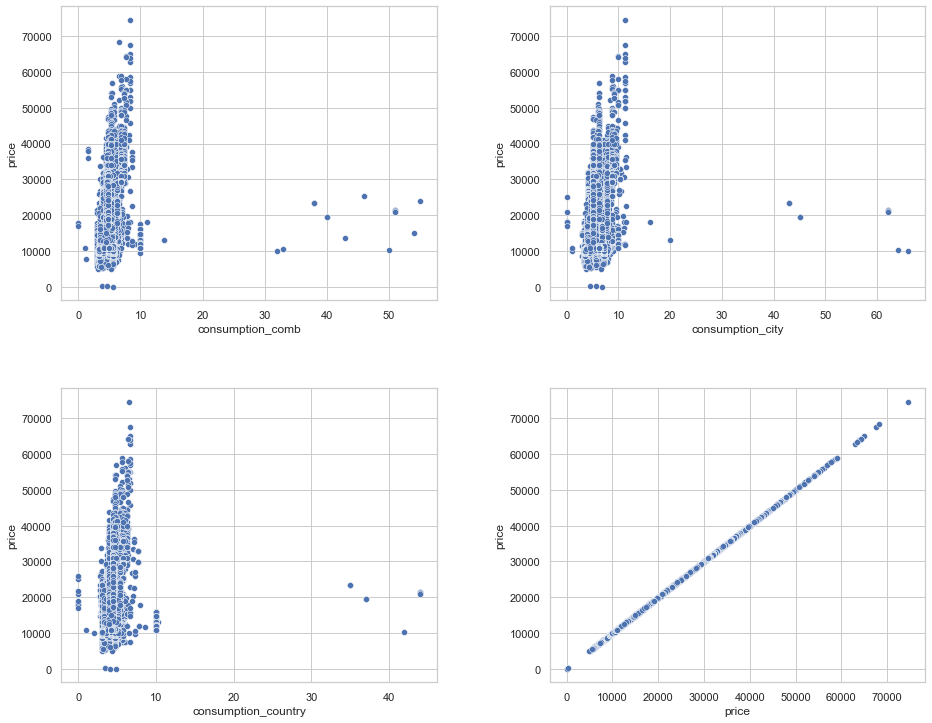

In [391]:
# Scatterplot for df_consumption

fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_consumption.columns):
        plt.subplot(4,2,i+1)
        sns.scatterplot(y= "price", x=col, data=df_consumption)

In [385]:
# Correlation between consumption_comb, consumption_city, consumption_country, price

df[['consumption_comb', 'consumption_city','consumption_country',"price"]].corr()

,consumption_comb,consumption_city,consumption_country,price
consumption_comb,1.000000,0.876602,0.904612,0.166745
consumption_city,0.876602,1.000000,0.898721,0.166502
consumption_country,0.904612,0.898721,1.000000,0.209249
price,0.166745,0.166502,0.209249,1.000000


As it is seen from the analysis above, there is strong relationship between consumption_comb, consumption_city, consumption_country columns. And also consumption_comb values are used the most. Therefore consumption_city and consumption_country columns will be dropped.

In [444]:
# append consumption_city and consumption_country colnames to cols_to_drop

cols_to_drop.append("consumption_city")
cols_to_drop.append("consumption_country")

In [446]:
cols_to_drop

['previous_owners',
 'body_color_original',
 'fill_with',
 'consumption_city',
 'consumption_country']

In [447]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'km',
       'prev_owner', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle',
       'body_color', 'paint_type', 'body_color_original', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement_cc', 'cylinders',
       'drive_chain', 'fuel', 'co_2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'gears', 'hp_kw', 'upholstery_type',
       'upholstery_color', 'weight_kg', 'consumption_comb', 'consumption_city',
       'consumption_country', 'age', 'fill_with', 'find'],
      dtype='object')

## Drop unnecessary columns

In [449]:
cols_to_drop.append("short_description")
cols_to_drop.append("next_inspection")
cols_to_drop.append("inspection_new")
cols_to_drop.append("non_smoking_vehicle")
cols_to_drop.append("full_service")
cols_to_drop.append("warranty")
cols_to_drop.append("fill_with")
cols_to_drop.append("find")
cols_to_drop

['previous_owners',
 'body_color_original',
 'fill_with',
 'consumption_city',
 'consumption_country',
 'short_description',
 'short_description',
 'next_inspection',
 'inspection_new',
 'non_smoking_vehicle',
 'full_service',
 'warranty',
 'fill_with',
 'find']

In [450]:
df.shape

(15919, 40)

In [451]:
df.drop(columns=cols_to_drop, inplace=True)

In [452]:
df.shape

(15919, 28)

In [453]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement_cc', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'upholstery_color', 'weight_kg', 'consumption_comb',
       'age'],
      dtype='object')

In [457]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
type                   0
body_color             0
paint_type             0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
displacement_cc        0
cylinders              0
drive_chain            0
fuel                   0
co_2_emission          0
emission_class         0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
hp_kw                  0
upholstery_type        0
upholstery_color       0
weight_kg              0
consumption_comb       0
age                    0
dtype: int64

## Saving df as filled_scout.csv

In [458]:
df.to_csv("filled_scout.csv", index=False)

In [459]:
pd.read_csv("filled_scout.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  float64
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   type                 15919 non-null  object 
 6   body_color           15919 non-null  object 
 7   paint_type           15919 non-null  object 
 8   nr_of_doors          15919 non-null  float64
 9   nr_of_seats          15919 non-null  float64
 10  gearing_type         15919 non-null  object 
 11  displacement_cc      15919 non-null  float64
 12  cylinders            15919 non-null  float64
 13  drive_chain          15919 non-null  object 
 14  fuel                 15919 non-null  object 
 15  co_2_emission        15919 non-null 

# PART- 3 `( Handling With Outliers )`

**Handling with outlier will be worked next notebook.**